# **Walmart Retail Sales Analysis**
## Careerera - Post Graduate Program Data Science
## Name: Vatsal Vinesh Mandalia
## Batch No. : WS102805

This is a capstone project part of the Careerera Post Graduate Programme Data Science Course. It was on time forecasting and the business problem focussed on predicting the sales of Walmart retail stores for the year 2013.

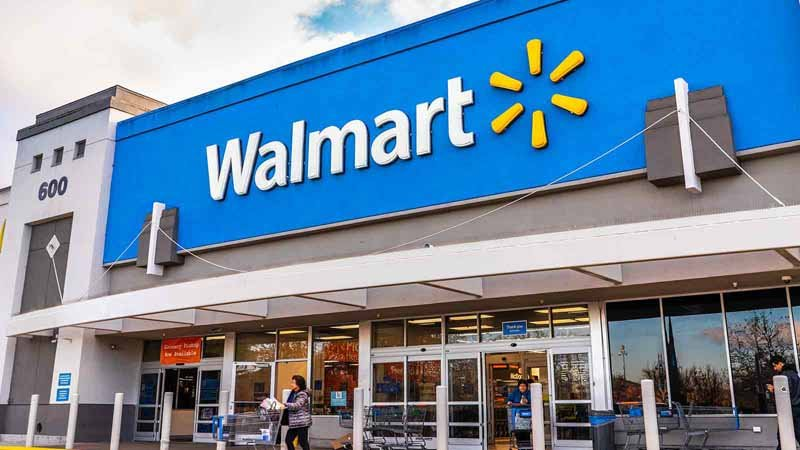




# **Context**:

Walmart, one of the leading retail stores in the USA, wants to predict the sales for each its 45 stores. We are provided with historical sales data for 45 stores located in different regions - with each store having a number of departments. The company also runs several promotional markdown events throughout the year where they precede prominent holidays, the four largest of which are the Super Bowl, Labour Day, Thanksgiving, and Christmas. The weeks including these holidays are weighted five times higher in the evaluation than non-holiday weeks.

# **Problem Statement**:
1.	Predict the department-wide sales for each store for the following year
2.	Model the effects of markdowns on holiday weeks
3.	Provide recommended actions based on the insights drawn, with prioritization placed on largest business impact

# **Datasets Information**:
1. ### **Stores**
- Anonymized information about the 45 stores, indicating the type and size of store
2. ### **Features**
Contains additional data related to the store, department, and regional activity for the given dates.
- Store - the store number
- Date - the week
- Temperature - average temperature in the region
- Fuel Price - cost of fuel in the region
- MarkDown1-5 - anonymized data related to promotional markdowns. Markdown data is only available after Nov 2011, and is not available for all stores all the time. Any missing value is marked with an NA
- CPI - the consumer price index
- Unemployment - the unemployment rate
- Is Holiday - whether the week is a special holiday week
3. ### **Sales**
- Historical sales data, which covers to 2010-02-05 to 2012-11-01. Within this tab you will find the following fields:
- Store - the store number
- Dept - the department number
- Date - the week
- Weekly Sales - sales for the given department in the given store
- Is Holiday - whether the week is a special holiday week



In [ ]:
# Importing the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# **Gathering the data**

In [ ]:
# Features data
df_features = pd.read_csv(r"/content/drive/MyDrive/Data/Features data set.csv")
# Sales data
df_sales = pd.read_csv(r"/content/drive/MyDrive/Data/sales data-set.csv")
# Stores data
df_stores = pd.read_csv(r"/content/drive/MyDrive/Data/stores data-set.csv")

# **Exploring the data**

In [ ]:
print(df_features.info())
display(df_features.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         8190 non-null   int64  
 1   Date          8190 non-null   object 
 2   Temperature   8190 non-null   float64
 3   Fuel_Price    8190 non-null   float64
 4   MarkDown1     4032 non-null   float64
 5   MarkDown2     2921 non-null   float64
 6   MarkDown3     3613 non-null   float64
 7   MarkDown4     3464 non-null   float64
 8   MarkDown5     4050 non-null   float64
 9   CPI           7605 non-null   float64
 10  Unemployment  7605 non-null   float64
 11  IsHoliday     8190 non-null   bool   
dtypes: bool(1), float64(9), int64(1), object(1)
memory usage: 712.0+ KB
None


,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,12/02/2010,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,19/02/2010,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,26/02/2010,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,05/03/2010,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [ ]:
print(df_sales.info())
display(df_sales.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
dtypes: bool(1), float64(1), int64(2), object(1)
memory usage: 13.3+ MB
None


,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,05/02/2010,24924.50,False
1,1,1,12/02/2010,46039.49,True
2,1,1,19/02/2010,41595.55,False
3,1,1,26/02/2010,19403.54,False
4,1,1,05/03/2010,21827.90,False


In [ ]:
print(df_stores.info())
display(df_stores.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Store   45 non-null     int64 
 1   Type    45 non-null     object
 2   Size    45 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 1.2+ KB
None


,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


# **Consolidating the data**

In [ ]:
df = df_sales.merge(df_features, on = ['Store','Date'], how = 'inner').merge(df_stores, on = 'Store', how = 'inner')

In [ ]:
df.head().append(df.tail())

<ipython-input-87-c08175bef99c>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df.head().append(df.tail())


,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y,Type,Size
0,1,1,05/02/2010,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315
1,1,2,05/02/2010,50605.27,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315
2,1,3,05/02/2010,13740.12,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315
3,1,4,05/02/2010,39954.04,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315
4,1,5,05/02/2010,32229.38,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315
421565,45,93,26/10/2012,2487.80,False,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,False,B,118221
421566,45,94,26/10/2012,5203.31,False,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,False,B,118221
421567,45,95,26/10/2012,56017.47,False,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,False,B,118221
421568,45,97,26/10/2012,6817.48,False,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,False,B,118221
421569,45,98,26/10/2012,1076.80,False,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,False,B,118221


Here we have weekly sales for each department of each store. Inner join is hence carried out to merge the 3 datasets into one. The data ranges from 05/02/2010 to 26/10/2012.

### **Dropping the duplicate column 'IsHoliday_y'**

In [ ]:
# Dropping the duplicate column and renaming 'IsHoliday_x'
df.drop('IsHoliday_y', axis = 1, inplace = True)
df.rename({'IsHoliday_x':'IsHoliday'}, axis = 1, inplace = True)
df

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,05/02/2010,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
1,1,2,05/02/2010,50605.27,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
2,1,3,05/02/2010,13740.12,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
3,1,4,05/02/2010,39954.04,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
4,1,5,05/02/2010,32229.38,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,93,26/10/2012,2487.80,False,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,B,118221
421566,45,94,26/10/2012,5203.31,False,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,B,118221
421567,45,95,26/10/2012,56017.47,False,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,B,118221
421568,45,97,26/10/2012,6817.48,False,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,B,118221


# **Checking for missing values**

In [ ]:
df.isnull().sum()

Store                0
Dept                 0
Date                 0
Weekly_Sales         0
IsHoliday            0
Temperature          0
Fuel_Price           0
MarkDown1       270889
MarkDown2       310322
MarkDown3       284479
MarkDown4       286603
MarkDown5       270138
CPI                  0
Unemployment         0
Type                 0
Size                 0
dtype: int64

In [ ]:
df.shape

(421570, 16)

There are missing values only in the columns MarkDown1-5.

### **Background on what is 'MarkDown' in Retail**:<br>
A markdown is a permanent price decrease for a product at the end of its lifecycle (or “seasonality”). Markdowns are used to temporarily increase demand for low-demand products, ideally long enough to sell through all stock.<br>
An example of markdown in retail is when a retailer reduces the price of a product to encourage customers to make a purchase. Markdowns are used to **clear out old inventory** and to **increase sales**.


## **Dealing with NaN values in MarkDown columns**
Instead of dropping the rows/columns with the missing values, the NaN values are imputed with '0'.

In [ ]:
df.fillna(0, axis = 1, inplace = True)

In [ ]:
df.isnull().sum()

Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
Temperature     0
Fuel_Price      0
MarkDown1       0
MarkDown2       0
MarkDown3       0
MarkDown4       0
MarkDown5       0
CPI             0
Unemployment    0
Type            0
Size            0
dtype: int64

# **Checking duplicate rows**

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421570 entries, 0 to 421569
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   Store         421570 non-null  object
 1   Dept          421570 non-null  object
 2   Date          421570 non-null  object
 3   Weekly_Sales  421570 non-null  object
 4   IsHoliday     421570 non-null  object
 5   Temperature   421570 non-null  object
 6   Fuel_Price    421570 non-null  object
 7   MarkDown1     421570 non-null  object
 8   MarkDown2     421570 non-null  object
 9   MarkDown3     421570 non-null  object
 10  MarkDown4     421570 non-null  object
 11  MarkDown5     421570 non-null  object
 12  CPI           421570 non-null  object
 13  Unemployment  421570 non-null  object
 14  Type          421570 non-null  object
 15  Size          421570 non-null  object
dtypes: object(16)
memory usage: 54.7+ MB


### **Number of departments and stores**

In [ ]:
print('Number of stores = ',df['Store'].nunique())
print('Number of departments = ',df['Dept'].nunique())

Number of stores =  45
Number of departments =  81


There are 45 stores and 81 departments. The department numbers go from 1-99. However, in some stores there is no weekly sales available for some departments.

# **Crunching the numbers - EDA**
### **Average weekly sales for each store against department**

In [ ]:
display(df.pivot_table(index = 'Store', columns = 'Dept', values = 'Weekly_Sales', aggfunc = "mean"))

Dept,1,2,3,4,5,6,7,8,9,10,...,90,91,92,93,94,95,96,97,98,99
Store,,,,,,,,,,,,,,,,,,,,,
1,22513.322937,46102.090420,13150.478042,36964.154476,24257.941119,4801.780140,24566.487413,35718.257622,28062.052238,31033.386364,...,82427.547832,64238.943427,135458.969510,71699.182378,63180.568182,120772.062168,33251.831639,35207.348811,11827.770769,306.091081
2,30777.980769,65912.922517,17476.563357,45607.666573,30555.315315,6808.382517,40477.837063,58707.369441,34375.864476,38845.854476,...,97611.537133,80610.380350,164840.230979,70581.977063,70018.672517,143588.751888,34319.063846,40697.204056,14035.400839,475.896905
3,7328.621049,16841.775664,5509.300769,8434.186503,11695.366573,2012.411818,10044.341608,8310.254196,9062.007692,10871.944126,...,1540.049161,318.685594,7568.280210,NaN,656.294444,15745.528252,3934.540000,343.437357,30.570833,NaN
4,36979.940070,93639.315385,19012.491678,56603.400140,45668.406783,8241.777692,50728.151399,62949.723776,34437.170979,37269.667413,...,89248.965524,66535.407203,159365.107902,67815.163007,68159.106573,147236.473706,38346.573077,39339.238951,15009.249371,623.182381
5,9774.553077,12317.953287,4101.085175,9860.806783,6699.202238,1191.057622,6124.484336,13735.709441,7919.805944,9783.395385,...,3059.520000,1457.221678,7759.205594,NaN,411.431486,19340.693986,5985.671119,667.070315,29.976087,NaN
6,23867.553776,50269.437273,16806.638811,34187.366503,34465.307622,7225.566643,34526.870420,47577.719790,48271.060140,47436.477902,...,53715.366084,45270.405175,99024.796503,41359.651189,41701.693497,89208.786294,30450.542238,20637.667063,9728.100629,388.636750
7,9542.801259,22603.690769,8633.536923,14950.518601,13860.350490,6329.928811,10925.757063,13970.619371,29722.736084,21136.560280,...,13858.405874,10263.880000,26530.890559,1328.178252,699.332522,34208.097273,1123.383217,4374.927902,260.886596,15.000000
8,14789.827343,35729.821748,10683.305105,21089.309301,19838.849231,3395.425455,20268.743776,26438.524336,11792.661678,20666.433776,...,39333.566154,31530.560909,60465.630000,27515.635315,25442.578042,62951.463706,16.986667,16978.366503,6880.466434,298.153714
9,11846.558252,24969.477413,7497.356783,17165.947762,19282.746014,2806.416364,13826.694336,21424.470699,13196.569720,12810.480350,...,2981.249510,869.273287,14123.063147,21.240000,599.112568,29575.050769,3596.107762,372.655556,27.930000,NaN


There are certain Departments with Average Weekly Sales in minus or NaN. But, sales cannot be minus.

So we look at the proportion of rows with Weekly Sales less than zero.

In [ ]:
df[df['Weekly_Sales'] < 0]

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
188,1,47,19/02/2010,-863.0,False,39.93,2.514,0,0,0,0,0,211.289143,8.106,A,151315
406,1,47,12/03/2010,-698.0,False,57.79,2.667,0,0,0,0,0,211.380643,8.106,A,151315
2549,1,47,08/10/2010,-58.0,False,63.93,2.633,0,0,0,0,0,211.746754,7.838,A,151315
3632,1,54,21/01/2011,-50.0,False,44.04,3.016,0,0,0,0,0,211.827234,7.742,A,151315
4419,1,47,08/04/2011,-298.0,False,67.84,3.622,0,0,0,0,0,215.074394,7.682,A,151315
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
419999,45,49,18/05/2012,-3.97,False,66.3,3.848,6813.74,0,13.86,936.49,2941.55,190.996448,8.567,B,118221
420066,45,49,25/05/2012,-4.97,False,67.21,3.798,5370.39,0,361.22,1287.62,2461.81,191.00281,8.567,B,118221
420403,45,49,29/06/2012,-34.0,False,75.22,3.506,3291.36,425.6,0,314.88,2255.34,191.099246,8.567,B,118221
420736,45,49,03/08/2012,-1.91,False,76.58,3.654,24853.05,39.56,17.96,11142.69,2768.32,191.16409,8.684,B,118221


There are 1285 rows with negative Weekly Sales, which is around 0.3% of the whole data. We can avoid including this data for further analysis.

In [ ]:
df_copy = df.copy()

In [ ]:
df = df[df['Weekly_Sales'] > 0]
display(df)

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,05/02/2010,24924.5,False,42.31,2.572,0,0,0,0,0,211.096358,8.106,A,151315
1,1,2,05/02/2010,50605.27,False,42.31,2.572,0,0,0,0,0,211.096358,8.106,A,151315
2,1,3,05/02/2010,13740.12,False,42.31,2.572,0,0,0,0,0,211.096358,8.106,A,151315
3,1,4,05/02/2010,39954.04,False,42.31,2.572,0,0,0,0,0,211.096358,8.106,A,151315
4,1,5,05/02/2010,32229.38,False,42.31,2.572,0,0,0,0,0,211.096358,8.106,A,151315
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,93,26/10/2012,2487.8,False,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,B,118221
421566,45,94,26/10/2012,5203.31,False,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,B,118221
421567,45,95,26/10/2012,56017.47,False,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,B,118221
421568,45,97,26/10/2012,6817.48,False,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,B,118221


### **IsHoliday - average weekly sales on holiday vs non-holiday**

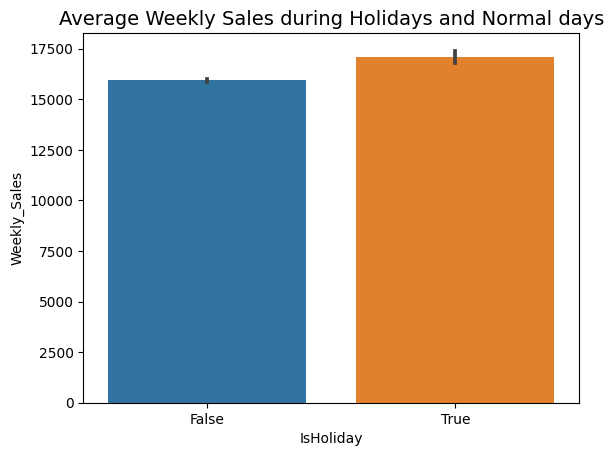

In [ ]:
sns.barplot(x = 'IsHoliday', y = 'Weekly_Sales', data = df)
plt.title('Average Weekly Sales during Holidays and Normal days', fontsize = 14)
plt.show()

On holiday weeks, the expectation is for high sales experienced by each store. This can be noted from the above plot with the average sales in a week being higher during Holidays than normal days.

For our data, we have four prominent holidays - Super Bowl, Labour Day, Thanksgiving and Christmas.

Lets look at the dates which depict each of the holidays.

In [ ]:
df[df['IsHoliday'] == True]['Date'].unique()

array(['12/02/2010', '10/09/2010', '26/11/2010', '31/12/2010',
       '11/02/2011', '09/09/2011', '25/11/2011', '30/12/2011',
       '10/02/2012', '07/09/2012'], dtype=object)

From the dates,
- Super Bowl: 12/02/2010, 11/02/2011, 10/02/2012
- Labour Day: 10/09/2010, 09/09/2011, 07/09/2012
- Thanksgiving: 26/11/2010, 25/11/2011
- Christmas: 31/12/2010, 30/12/2011

Now we look at the Weekly Sales for each of the four holidays.

In [ ]:
# Holiday dates
Superbowl = ['12/02/2010', '11/02/2011', '10/02/2012']
Labourday = ['10/09/2010', '09/09/2011', '07/09/2012']
Thanksgiving = ['26/11/2010', '25/11/2011']
Christmas = ['31/12/2010', '30/12/2011']

To make our analysis simpler, we create a new column 'Holiday_name' which takes in takes in values like 'Super_Bowl', 'Labour_Day', 'Thanksgiving', 'Christmas' and 'Not_Holiday'.

In [ ]:
# Super Bowl
df.loc[(df.Date == '12/02/2010')|(df.Date == '11/02/2011')|(df.Date == '10/02/2012'), 'Holiday_name'] = 'Super_Bowl'
# Labour Day
df.loc[(df.Date == '10/09/2010')|(df.Date == '09/09/2011')|(df.Date == '07/09/2012'), 'Holiday_name'] = 'Labour_Day'
# Thanksgiving
df.loc[(df.Date == '26/11/2010')|(df.Date == '25/11/2011'), 'Holiday_name'] = 'Thanksgiving'
# Christmas
df.loc[(df.Date == '31/12/2010')|(df.Date == '30/12/2011'), 'Holiday_name'] = 'Christmas'

# Normal days
df.loc[(df.Date != '12/02/2010')&(df.Date != '11/02/2011')&(df.Date != '10/02/2012')&(df.Date != '10/09/2010')&\
       (df.Date != '09/09/2011')&(df.Date != '07/09/2012')&(df.Date != '26/11/2010')&(df.Date != '25/11/2011')&\
       (df.Date != '31/12/2010')&(df.Date != '30/12/2011'), 'Holiday_name'] = 'Not_Holiday'

<ipython-input-103-404fdb7f14fd>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[(df.Date == '12/02/2010')|(df.Date == '11/02/2011')|(df.Date == '10/02/2012'), 'Holiday_name'] = 'Super_Bowl'


In [ ]:
display(df.Holiday_name.value_counts())

Not_Holiday     390652
Super_Bowl        8873
Labour_Day        8832
Thanksgiving      5946
Christmas         5909
Name: Holiday_name, dtype: int64

In [ ]:
holidays = ['Super_Bowl', 'Labour_Day', 'Thanksgiving', 'Christmas']

## **Average weekly sales across each holiday**

Now we look at average Weekly Sales for each holiday.

In [ ]:
df.groupby('Holiday_name').agg({'Weekly_Sales':'mean'}).sort_values('Weekly_Sales', ascending = False)

,Weekly_Sales
Holiday_name,
Thanksgiving,22269.601768
Super_Bowl,16418.777595
Not_Holiday,15952.816352
Labour_Day,15934.061154
Christmas,14635.139843


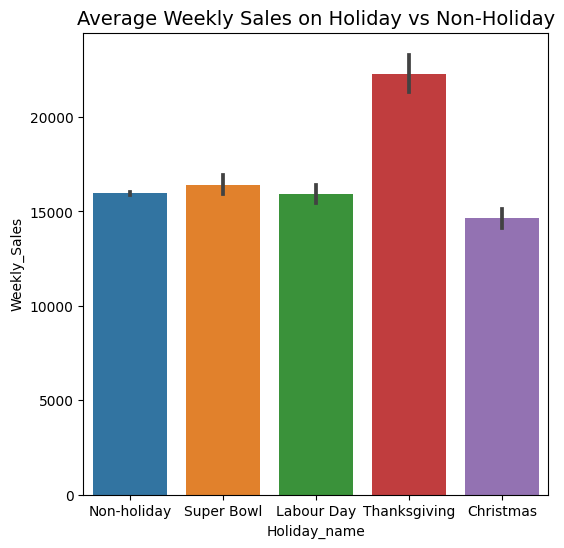

In [ ]:
# Average weekly sales across holidays vs non-holiday
plt.figure(figsize = (6,6))
sns.barplot(x = 'Holiday_name', y = 'Weekly_Sales', data = df)
plt.title('Average Weekly Sales on Holiday vs Non-Holiday', fontsize = 14)
plt.xticks(np.arange(5), labels = ['Non-holiday', 'Super Bowl', 'Labour Day', 'Thanksgiving', 'Christmas'])
plt.show()

Thanksgiving is the holiday customers intend to spend more in retail stores with average weekly sales approximately 40% more than on normal days.

On the other hand, during Christmas weeks, the average sales are the lowest which is a peculiar point to note.

## **Variation of weekly sales for holiday vs non-holiday**

Holiday_name
Christmas       19390.164285
Labour_Day      22637.556613
Not_Holiday     22348.240736
Super_Bowl      23413.790965
Thanksgiving    41275.017792
Name: Weekly_Sales, dtype: float64

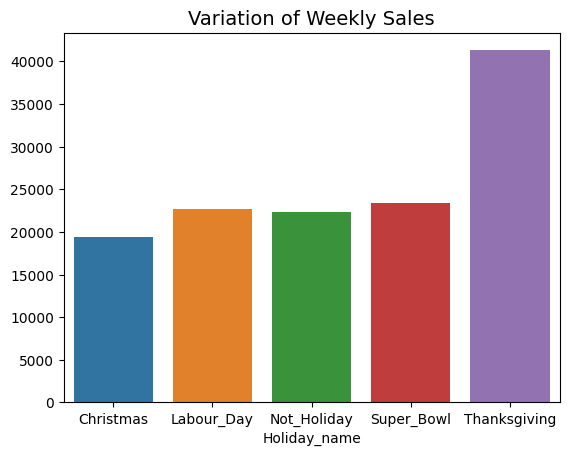

In [ ]:
# Variation of sales across holidays vs non-holiday
sales_std = df.groupby('Holiday_name').Weekly_Sales.std()
display(sales_std)
sns.barplot(x = sales_std.index, y = sales_std.values, data = df)
plt.title('Variation of Weekly Sales', fontsize = 14)
plt.show()


# **Proportion of Each Type in the Stores**
Out of 45 stores, how many are of type A/B/C

In [ ]:
df_stores.Type.value_counts()/45*100.0

A    48.888889
B    37.777778
C    13.333333
Name: Type, dtype: float64

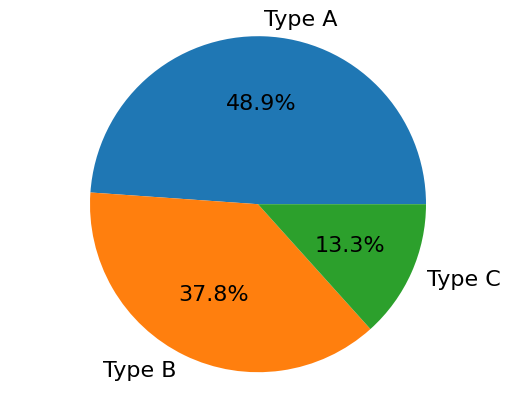

In [ ]:
# Pie chart
data = [48.888889, 37.777778, 13.333333]
labels = 'Type A', 'Type B', 'Type C'
plt.pie(data, labels = labels, textprops = {'fontsize':16}, autopct = '%1.1f%%')
plt.axis('equal')
plt.show()

Almost half of the 45 stores are of Type A, with types B and C at 38% and 13% respectively.

## **Sales for each Type during Holidays**

,IsHoliday,Type,Weekly_Sales
0,False,A,20058.212098
1,False,B,12204.870740
2,False,C,9548.251972
3,True,A,21332.892028
4,True,B,13423.406047
5,True,C,9565.533649


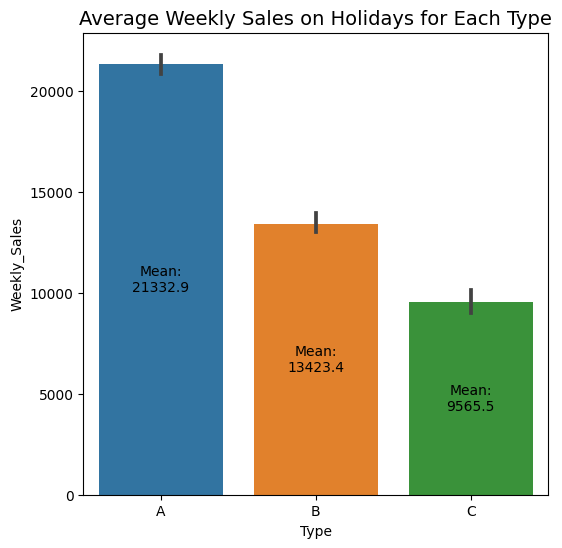

In [ ]:
holi_type = df.groupby(['IsHoliday', 'Type']).Weekly_Sales.mean().reset_index()
display(holi_type)

fig,ax = plt.subplots(figsize = (6,6))
sns.barplot(x = 'Type', y = 'Weekly_Sales', data = df[df['IsHoliday'] == True], ax = ax)

ax.bar_label(ax.containers[-1], fmt = "Mean:\n%.1f", label_type = "center")
plt.title('Average Weekly Sales on Holidays for Each Type', fontsize = 14)
plt.show()

Type A store gets close to 60% more weekly sales on average than the Type B. Average weekly sales for Type C is lower than half of the sales from Type A.

## **Average Weekly Sales across four holidays and each store type**

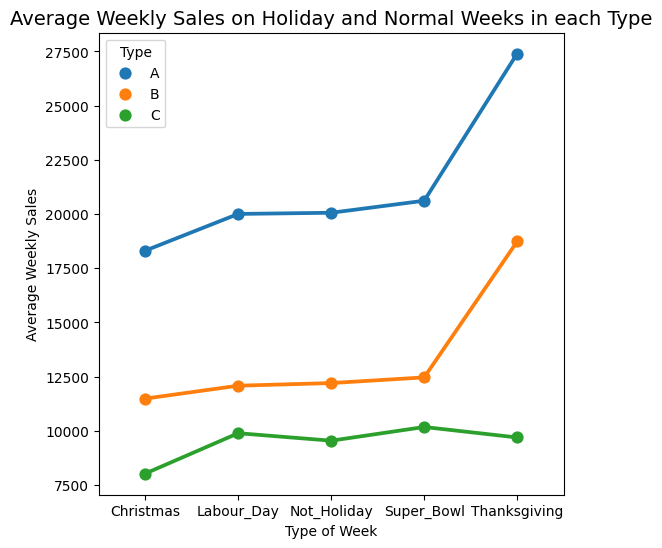

In [ ]:
hol_type = df.groupby(['Holiday_name','Type']).Weekly_Sales.mean().reset_index()

plt.figure(figsize = (6,6))
sns.pointplot(x = 'Holiday_name', y = 'Weekly_Sales', hue = 'Type', data = hol_type)
plt.title('Average Weekly Sales on Holiday and Normal Weeks in each Type', fontsize = 14)
plt.xlabel('Type of Week')
plt.ylabel('Average Weekly Sales')
plt.show()

One pattern seen is that the average weekly sales in types A and B are significantly higher on Thanksgiving in comparison to other holidays. This trend is absent in type C.

Across all types, Christmas experiences the lowest weekly sales on average which is a trend to keep an eye on.

# **Relation between Size and Type of the Store**

In [ ]:
df_stores.groupby('Type').describe()['Size']

,count,mean,std,min,25%,50%,75%,max
Type,,,,,,,,
A,22.0,177247.727273,49392.621098,39690.0,155840.75,202406.0,203819.0,219622.0
B,17.0,101190.705882,32371.137916,34875.0,93188.00,114533.0,123737.0,140167.0
C,6.0,40541.666667,1304.145033,39690.0,39745.00,39910.0,40774.0,42988.0


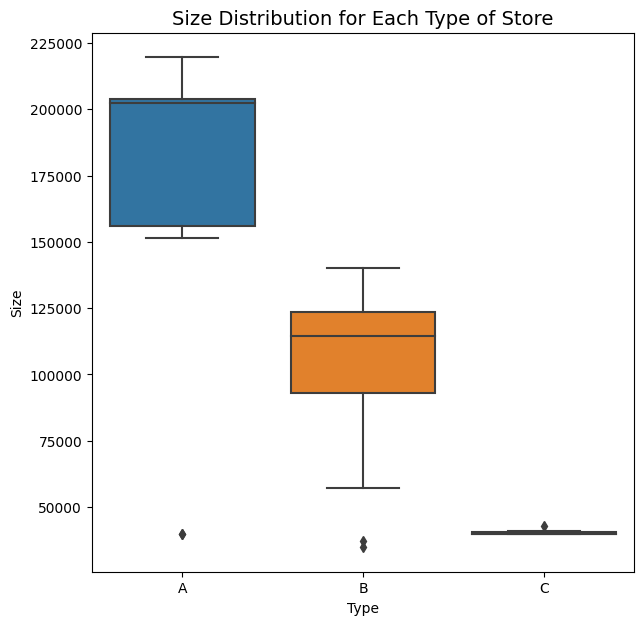

In [ ]:
plt.figure(figsize = (7,7))
sns.boxplot(x = 'Type', y = 'Size', data = df_stores)
plt.title('Size Distribution for Each Type of Store', fontsize = 14)
plt.show()

The boxplots show the extremes in terms of the size of each store type. The hierarchical trend seen above for the 3 types matches with the expectation coming from analysing average weekly sales.

Greater the store size, higher will be sales experienced by the store. This is clearly visible with type A performing well in sales with B and C following it.

In addition, a distinct classification has been done between each type based on the size. Lowest size of A is still greater than the maximum size of B.

### **Converting Date to datetime data type**

In [ ]:
df.Date = pd.to_datetime(df.Date)

<ipython-input-115-768506901f47>:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df.Date = pd.to_datetime(df.Date)
<ipython-input-115-768506901f47>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Date = pd.to_datetime(df.Date)


In [ ]:
df.dtypes

Store                   object
Dept                    object
Date            datetime64[ns]
Weekly_Sales            object
IsHoliday               object
Temperature             object
Fuel_Price              object
MarkDown1               object
MarkDown2               object
MarkDown3               object
MarkDown4               object
MarkDown5               object
CPI                     object
Unemployment            object
Type                    object
Size                    object
Holiday_name            object
dtype: object

In [ ]:
df['Year'] = df.Date.dt.year
df['Month'] = df.Date.dt.month

<ipython-input-117-5719699f226a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Year'] = df.Date.dt.year
<ipython-input-117-5719699f226a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Month'] = df.Date.dt.month


In [ ]:
df.Date.head()

0   2010-05-02
1   2010-05-02
2   2010-05-02
3   2010-05-02
4   2010-05-02
Name: Date, dtype: datetime64[ns]

# **Exploring the Sales across Each Department**

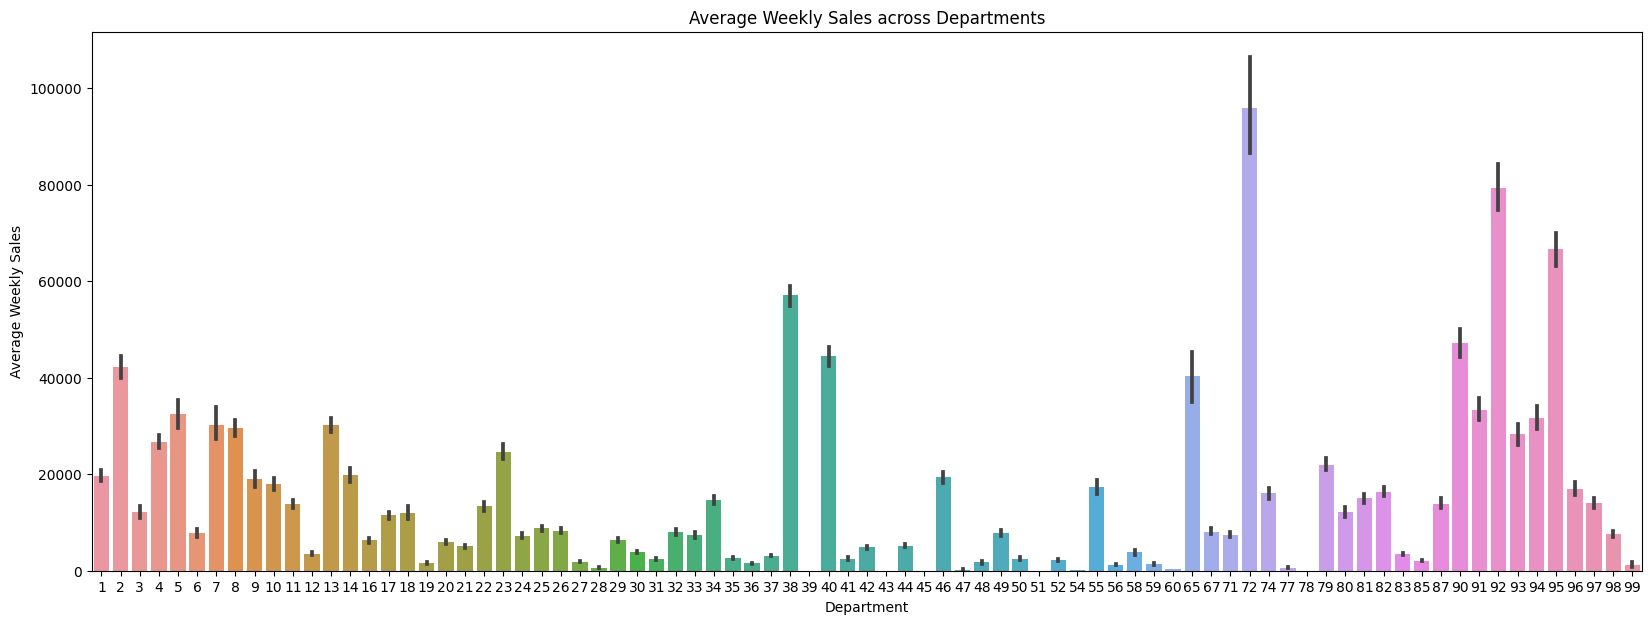

In [ ]:
# Weekly Sales for each Department
plt.figure(figsize = (20,7))
sns.barplot(x = 'Dept', y = 'Weekly_Sales', data = df[df.IsHoliday == True], label = 'Holiday Sales')
plt.ylabel('Average Weekly Sales')
plt.xlabel('Department')
plt.title('Average Weekly Sales across Departments')
plt.show()

Department 72, 92 and 95 are in top 3 for average weekly sales on holidays, with a select more closely behind.

For certain departments like 39, 43, 45, 51, 54 and 78 we don't find any weekly sales.

## **Weekly sales across each year**

- Super Bowl: 12/02/2010, 11/02/2011, 10/02/2012
- Labour Day: 10/09/2010, 09/09/2011, 07/09/2012
- Thanksgiving: 26/11/2010, 25/11/2011
- Christmas: 31/12/2010, 30/12/2011

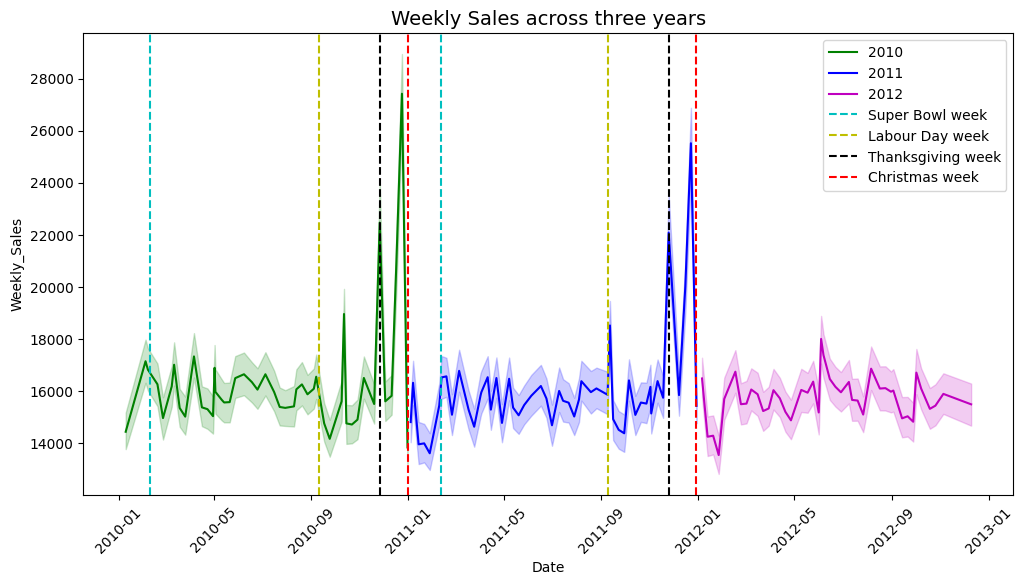

In [ ]:
# Weekly sales for the three years
plt.figure(figsize = (12,6))
sns.lineplot(x = 'Date', y = 'Weekly_Sales', hue = 'Year', data = df, palette = ['g','b','m'])
plt.xticks(rotation = 45)
plt.axvline(x = pd.to_datetime('2010-02-10'), color = 'c', linestyle = '--', label = 'Super Bowl week')
plt.axvline(x = pd.to_datetime('2011-02-11'), color = 'c', linestyle = '--')
plt.axvline(x = pd.to_datetime('2010-09-10'), color = 'y', linestyle = '--', label = 'Labour Day week')
plt.axvline(x = pd.to_datetime('2011-09-09'), color = 'y', linestyle = '--')
plt.axvline(x = pd.to_datetime('2010-11-26'), color = 'k', linestyle = '--', label = 'Thanksgiving week')
plt.axvline(x = pd.to_datetime('2011-11-25'), color = 'k', linestyle = '--')
plt.axvline(x = pd.to_datetime('2010-12-31'), color = 'r', linestyle = '--', label = 'Christmas week')
plt.axvline(x = pd.to_datetime('2011-12-30'), color = 'r', linestyle = '--')

plt.legend()
plt.title('Weekly Sales across three years', fontsize = 14)
plt.show()

- The weekly sales from the stores shows interesting trends for 2010, 2011 and 2012. At the start of Thanksgiving week for 2010 and 2011, the sales shoot up which was expected due to consumers hopping to stores to spend.
- A 'double-peak' feature is seen between Thanksgiving and start of Christmas. The second peak is significantly bigger than its predecessor. This could mean customer going to retail stores to spend a week before Christmas.
- Customers spend in Thanksgiving and then there is an expectation for footfall to be lower in retail stores during Christmas. This feature is repeated across 2010 and 2011.

## **Weekly Sales across months**

Month
1     14561.457921
2     16064.097614
3     15681.493265
4     15689.989492
5     15907.731449
6     16321.475757
7     15609.562094
8     16058.375106
9     15428.136086
10    15770.618027
11    17326.678722
12    18410.183071
Name: Weekly_Sales, dtype: float64

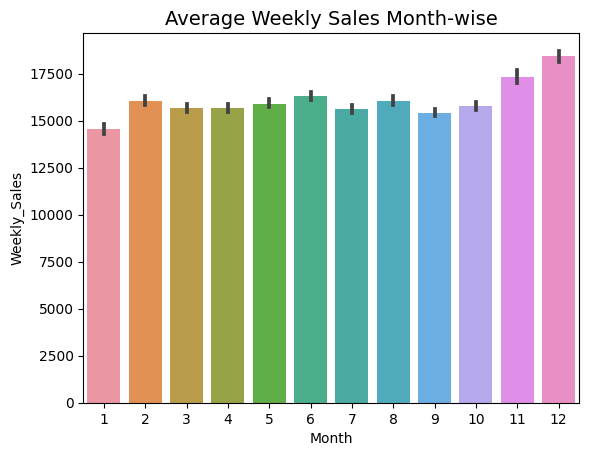

In [ ]:
display(df.groupby('Month').Weekly_Sales.mean())
sns.barplot(x = 'Month', y = 'Weekly_Sales', data = df)
plt.title('Average Weekly Sales Month-wise', fontsize = 14)
plt.show()

The month of January experiences the lowest average sales, whereas the rest of the months show a minimum 15000 in sales.

November and December are in top two for retail sales which is due to Thanksgiving and Christmas weeks falling.

## **Heatmap of sales of stores across months**

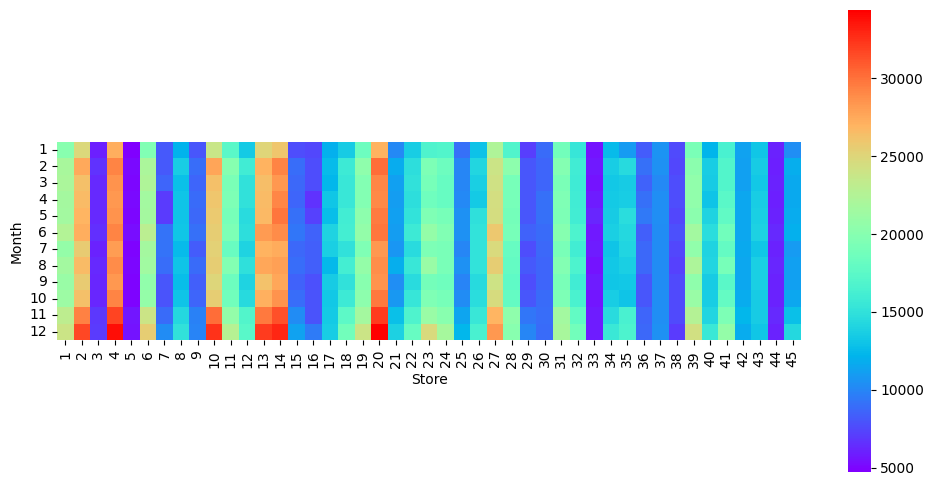

In [ ]:
sales_store_mon = df.pivot_table(index = 'Month', columns = 'Store', values = 'Weekly_Sales', aggfunc = 'mean')
# display(sales_store_mon)
plt.figure(figsize = (12,6))
sns.heatmap(sales_store_mon, square = True, cmap = 'rainbow')
plt.show()

For majority of the stores the average sales lie below 20000, with store number 5, 33 and 44 in the bottom three for sales.

There are 6 stores who get higher sales across a year than the rest of the stores. For November and December these selected stores get close to 30000 in sales on average.

## **Weekly Sales across each Type of store**

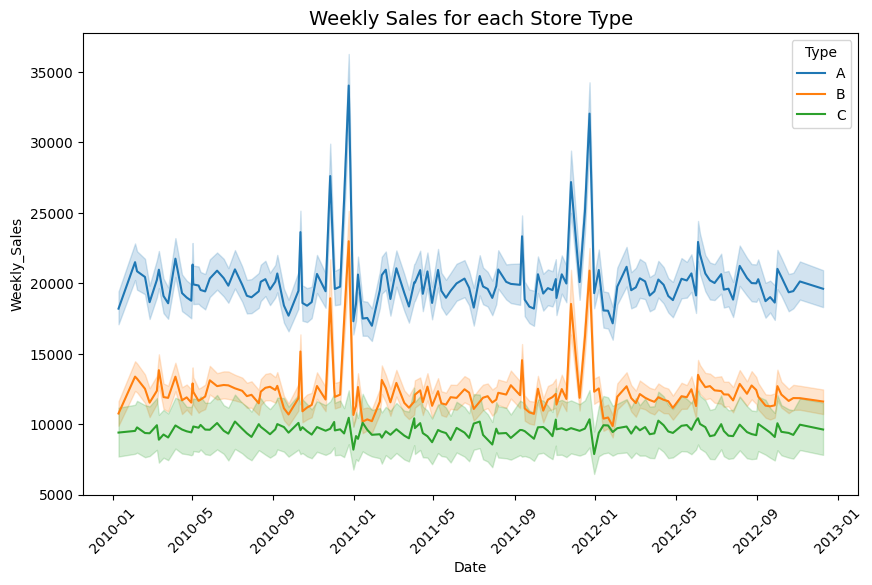

In [ ]:
plt.figure(figsize = (10,6))
sns.lineplot(x = 'Date', y = 'Weekly_Sales', hue = 'Type', data = df)
plt.xticks(rotation = 45)
plt.title('Weekly Sales for each Store Type', fontsize = 14)
plt.show()

The trend of weekly sales for type A and B store is similar, with the appearance of double-peak features. Type A is at the top of the in terms of sales followed by B and C.

## **Effect of temperature on weekly sales**

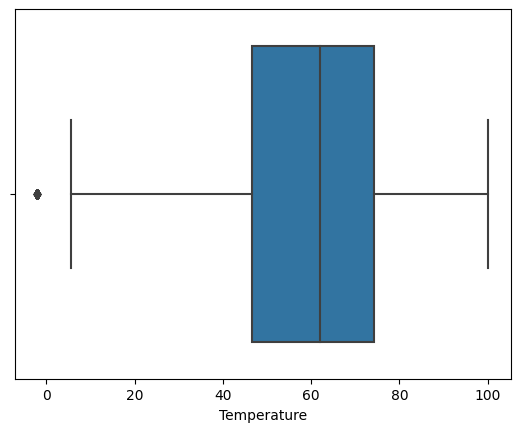

In [ ]:
sns.boxplot(x = 'Temperature', data = df)
plt.show()

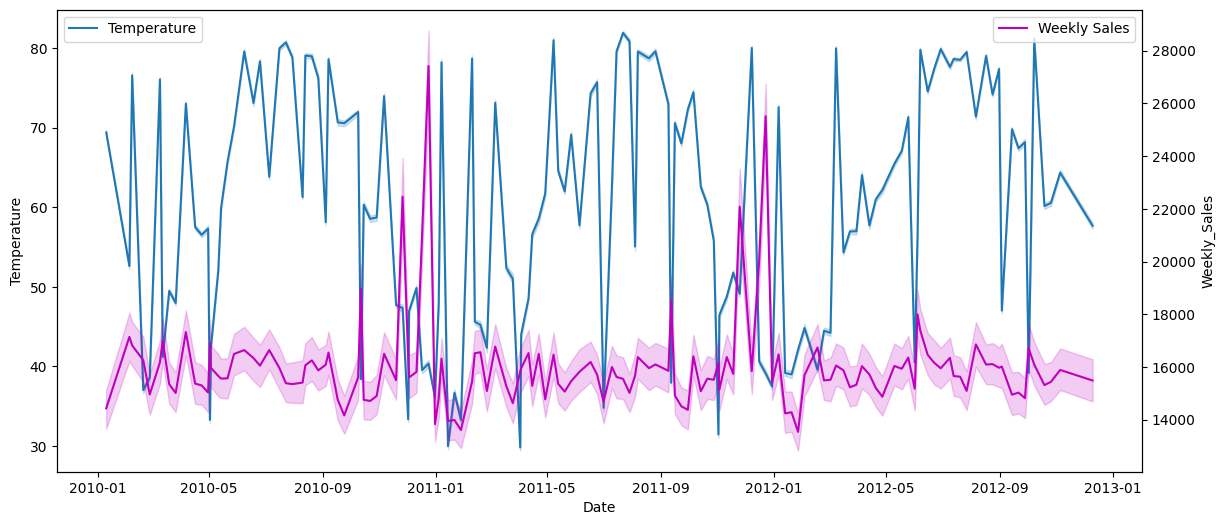

In [ ]:
plt.figure(figsize = (14,6))
sns.lineplot(x = 'Date', y = 'Temperature', data = df, label = 'Temperature')
ax2 = plt.twinx()
sns.lineplot(x = 'Date', y = 'Weekly_Sales', data = df, color = 'm', ax = ax2, label = 'Weekly Sales')
plt.xticks(rotation = 45)
plt.legend()
plt.show()

For months of November and December, as temperatures drop sales shoot up due to more footfall of customers to the retail stores.

On the other hand, sales follow the normal trend for the rest of the months as temperatures are high.

## **Average weekly sales across holidays for each store**

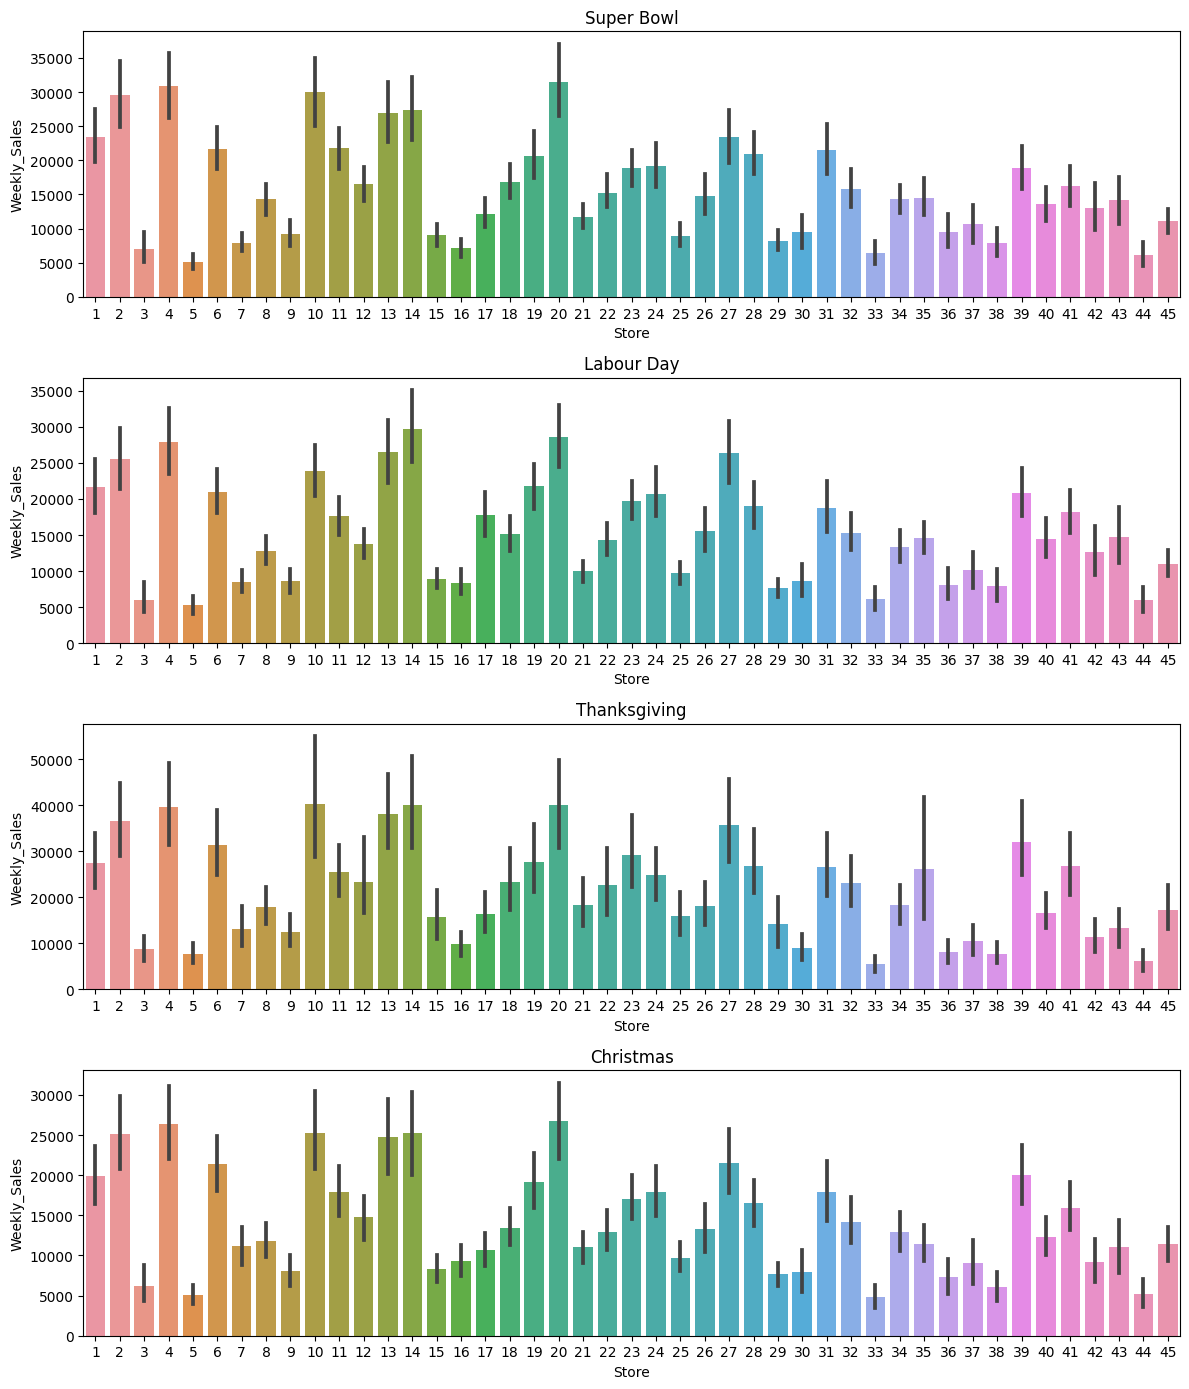

In [ ]:
fig, ax = plt.subplots(4,1,figsize = (12,14))
sns.barplot(ax = ax[0], x = 'Store', y = 'Weekly_Sales', data = df[df.Holiday_name=='Super_Bowl'])
sns.barplot(ax = ax[1], x = 'Store', y = 'Weekly_Sales', data = df[df.Holiday_name=='Labour_Day'])
sns.barplot(ax = ax[2], x = 'Store', y = 'Weekly_Sales', data = df[df.Holiday_name=='Thanksgiving'])
sns.barplot(ax = ax[3], x = 'Store', y = 'Weekly_Sales', data = df[df.Holiday_name=='Christmas'])

ax[0].set_title('Super Bowl')
ax[1].set_title('Labour Day')
ax[2].set_title('Thanksgiving')
ax[3].set_title('Christmas')
plt.tight_layout()
plt.show()

## **Top three stores in average weekly sales across each holiday and non-holiday**

In [ ]:
# top 3 stores in four holidays and non-holiday
for h in df.Holiday_name.unique():
  print(h)
  display(pd.DataFrame(df[df.Holiday_name==h].groupby('Store').Weekly_Sales.sum().sort_values(ascending=False).head(3)))

Not_Holiday


,Weekly_Sales
Store,
20,278909600.599999
4,277114243.06
14,267796034.46


Super_Bowl


,Weekly_Sales
Store,
20,6783474.32
4,6750815.32
10,6510532.54


Labour_Day


,Weekly_Sales
Store,
14,6299023.0
20,6146633.38
4,6084064.54


Thanksgiving


,Weekly_Sales
Store,
10,5890145.02
4,5794171.78
20,5717889.32


Christmas


,Weekly_Sales
Store,
20,3843783.83
4,3801974.6
13,3644348.91


Across the four holidays and on non-holidays, stores 20,4,14 and 10 occupy the top 3, albeit with positions interchanged.

## **Distribution of Weekly Sales**

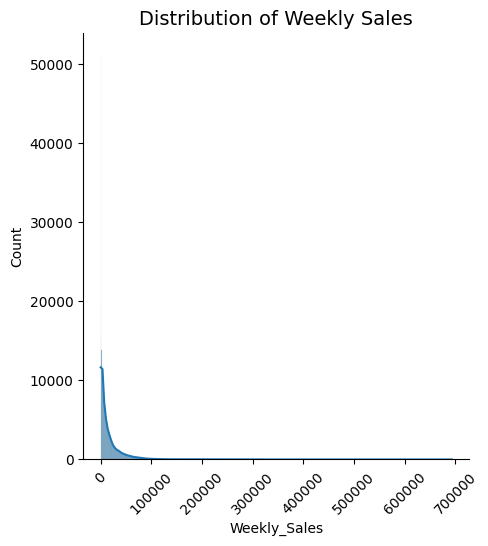

In [ ]:
sns.displot(df.Weekly_Sales, kde = True)
plt.xticks(rotation = 45)
plt.title('Distribution of Weekly Sales', fontsize = 14)
plt.show()

The distribution shows high positive skewness as a long tail can be observed to the right of the peak.

## **Markdown effect on Weekly Sales**

- Super Bowl: 12/02/2010, 11/02/2011, 10/02/2012
- Labour Day: 10/09/2010, 09/09/2011, 07/09/2012
- Thanksgiving: 26/11/2010, 25/11/2011
- Christmas: 31/12/2010, 30/12/2011

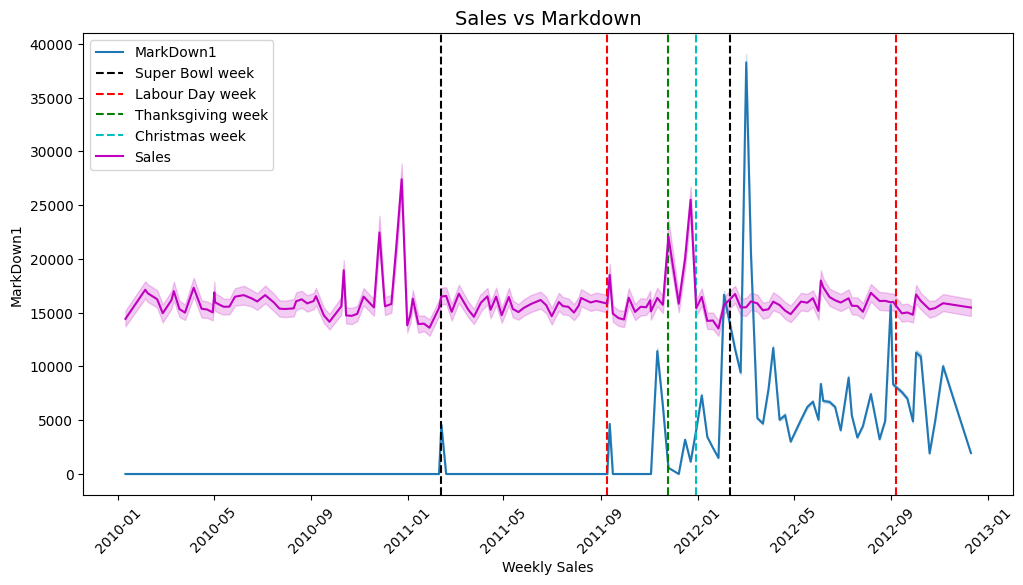

In [ ]:
plt.figure(figsize = (12,6))
sns.lineplot(x = 'Date', y = 'MarkDown1', data = df, label = 'MarkDown1')
plt.axvline(x = pd.to_datetime('2012-02-10'), color = 'k', linestyle = '--', label = 'Super Bowl week')
plt.axvline(x = pd.to_datetime('2012-09-07'), color = 'r', linestyle = '--', label = 'Labour Day week')
plt.axvline(x = pd.to_datetime('2011-11-25'), color = 'g', linestyle = '--', label = 'Thanksgiving week')
plt.axvline(x = pd.to_datetime('2011-12-30'), color = 'c', linestyle = '--', label = 'Christmas week')

plt.axvline(x = pd.to_datetime('2011-02-11'), color = 'k', linestyle = '--')
plt.axvline(x = pd.to_datetime('2011-09-09'), color = 'r', linestyle = '--')
# ax2 = plt.twinx()
sns.lineplot(x = 'Date', y = 'Weekly_Sales', data = df, color = 'm', label = 'Sales')
plt.xlabel('Weekly Sales')
plt.xticks(rotation = 45)
plt.title('Sales vs Markdown', fontsize = 14)
plt.legend(loc = 'best')
plt.show()

- Markdown is done by retail stores to increase sales and for clearing the inventory. From above, in 2011, the markdown happens in Super Bowl and Labour Day weeks and there is a peak in weekly sales at these two points.

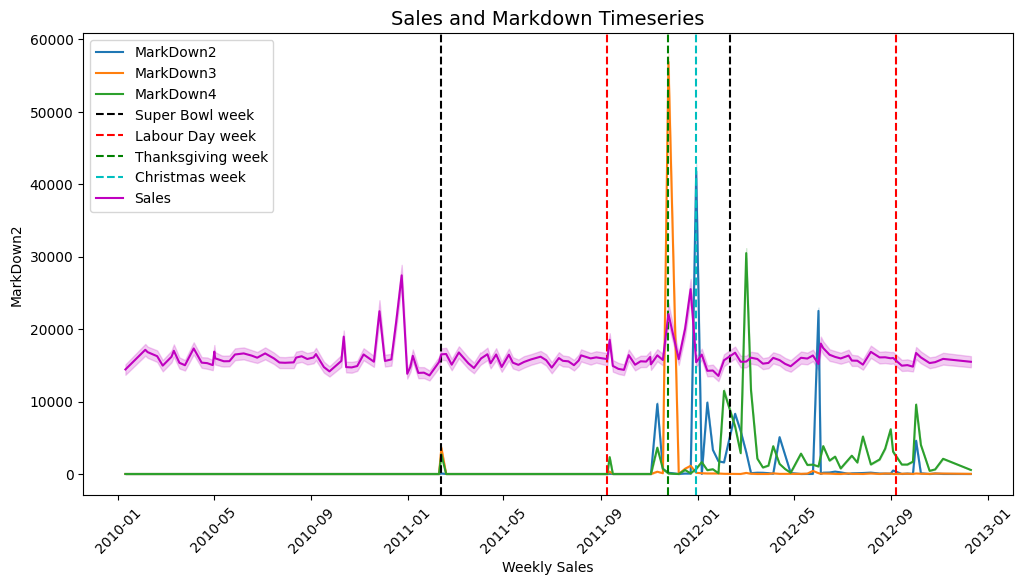

In [ ]:
plt.figure(figsize = (12,6))
sns.lineplot(x = 'Date', y = 'MarkDown2', data = df, label = 'MarkDown2')
sns.lineplot(x = 'Date', y = 'MarkDown3', data = df, label = 'MarkDown3')
sns.lineplot(x = 'Date', y = 'MarkDown4', data = df, label = 'MarkDown4')

plt.axvline(x = pd.to_datetime('2012-02-10'), color = 'k', linestyle = '--', label = 'Super Bowl week')
plt.axvline(x = pd.to_datetime('2012-09-07'), color = 'r', linestyle = '--', label = 'Labour Day week')
plt.axvline(x = pd.to_datetime('2011-11-25'), color = 'g', linestyle = '--', label = 'Thanksgiving week')
plt.axvline(x = pd.to_datetime('2011-12-30'), color = 'c', linestyle = '--', label = 'Christmas week')

plt.axvline(x = pd.to_datetime('2011-02-11'), color = 'k', linestyle = '--')
plt.axvline(x = pd.to_datetime('2011-09-09'), color = 'r', linestyle = '--')
# ax2 = plt.twinx()
sns.lineplot(x = 'Date', y = 'Weekly_Sales', data = df, color = 'm', label = 'Sales')
plt.xlabel('Weekly Sales')
plt.xticks(rotation = 45)
plt.title('Sales and Markdown Timeseries', fontsize = 14)
plt.legend(loc = 'best')
plt.show()

- On Thanksgiving, major markdown is done and the sales also peak at this time.

## **Total Sales across each year**

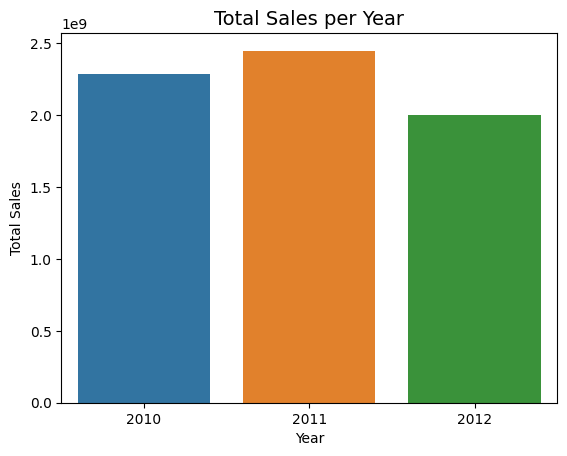

In [ ]:
sales_year = df.groupby('Year').Weekly_Sales.sum()
sns.barplot(x = sales_year.index, y = sales_year.values)
plt.ylabel('Total Sales')
plt.title('Total Sales per Year', fontsize = 14)
plt.show()

## **Average Sales in Stores during all MarkDown Events**

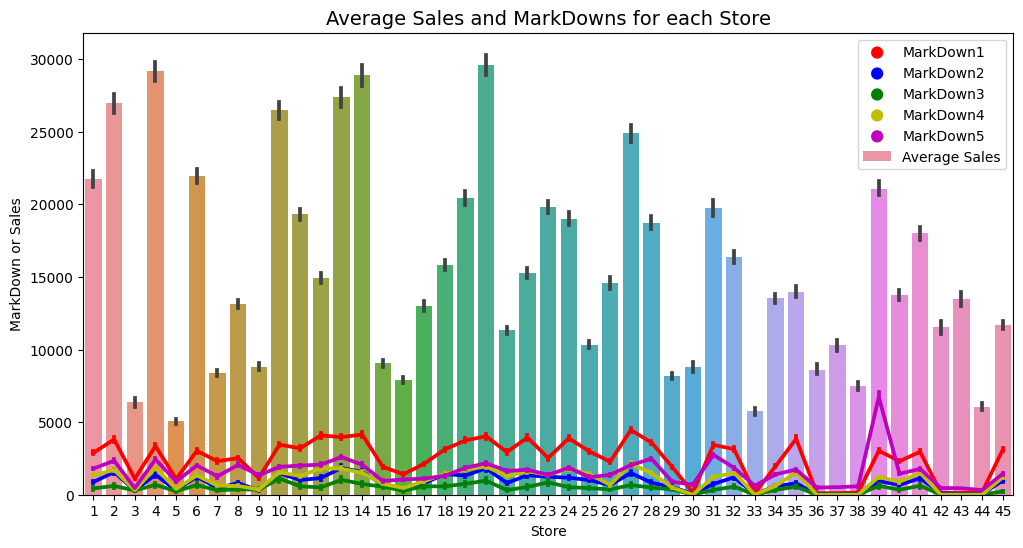

In [ ]:
# Average sales and markdown events for 45 stores
plt.figure(figsize=(12,6))
sns.pointplot(x='Store', y='MarkDown1', data = df, color='r', label='MarkDown1')
sns.pointplot(x='Store', y='MarkDown2', data = df, color='b', label='MarkDown2')
sns.pointplot(x='Store', y='MarkDown3', data = df, color='g', label='MarkDown3')
sns.pointplot(x='Store', y='MarkDown4', data = df, color='y', label='MarkDown4')
sns.pointplot(x='Store', y='MarkDown5', data = df, color='m', label='MarkDown5')

sns.barplot(x='Store', y='Weekly_Sales', data = df, label='Average Sales')
plt.ylabel('MarkDown or Sales')
plt.title('Average Sales and MarkDowns for each Store', fontsize = 14)
plt.legend()
plt.show()

- There is a vague trend noticed wherein the average sales for a store increase with rise in the markdown value.

## **Markdown Events on Holidays vs non-holiday**

Do retailers prefer certain holidays for introducing markdown events?<br> That is the question we will explore.

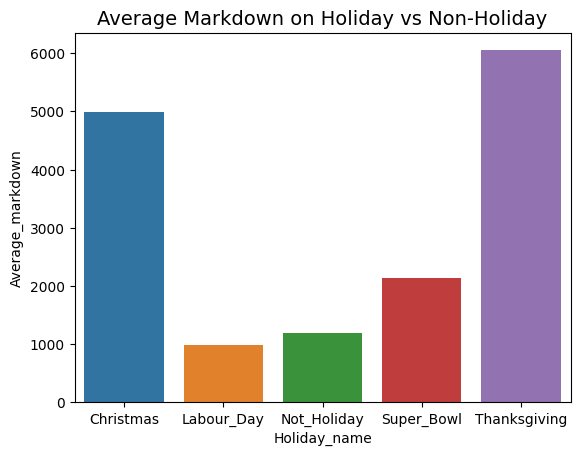

In [ ]:
# Markdowns for holiday vs non-holiday
df_holmark = df.groupby('Holiday_name').agg({'MarkDown1':'mean','MarkDown2':'mean','MarkDown3':'mean','MarkDown4':'mean','MarkDown5':'mean'})
# display(df_holmark.head())
df_holmark['Average_markdown'] = df_holmark[['MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5']].mean(axis=1)

sns.barplot(x=df_holmark.index, y=df_holmark['Average_markdown'])
plt.title('Average Markdown on Holiday vs Non-Holiday', fontsize = 14)
plt.show()

- Average value of the markdown is the lowest on Labour day week. On the other hand, Thanksgiving and Christmas are at the top of this list.
- Retailers introduce markdowns to boost sales of a product by drastically reducing their prices and to clear out the inventory in their stores.
- Thanksgiving and christmas being at the top indicates retailers know about these weeks witnessing significant footfall and sales in the stores. Hence, we can assume markdowns to be conducted in periods where customer spending is expected.

## **Spread of sales for each store**

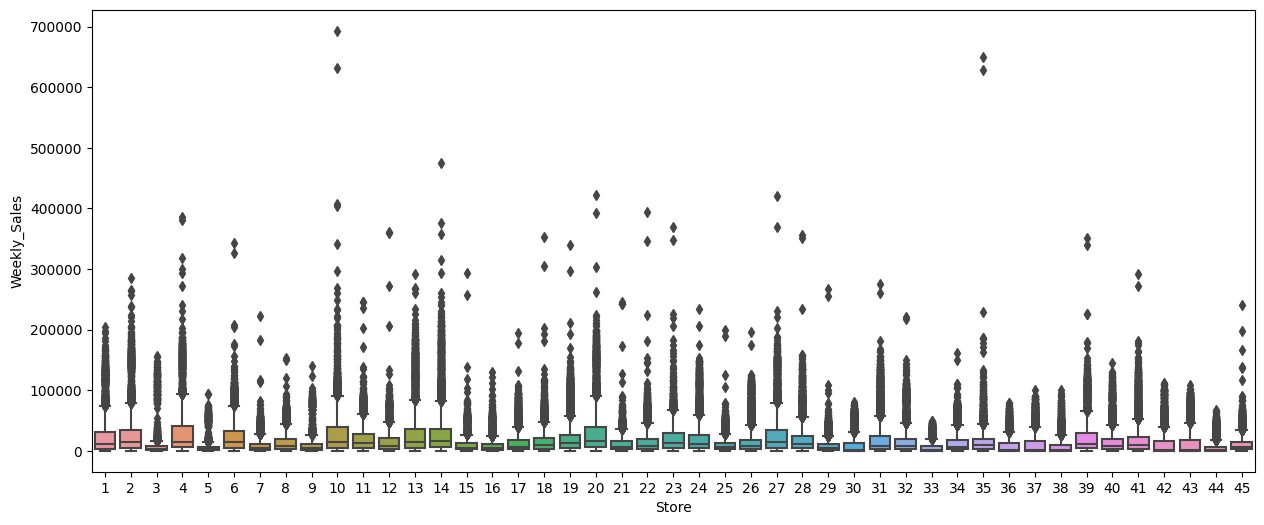

In [ ]:
sales_store_std = pd.DataFrame(df.groupby('Store').Weekly_Sales.std()).reset_index()
# display(sales_store_std)

plt.figure(figsize = (15,6))
sns.boxplot(x = 'Store', y = 'Weekly_Sales', data = df)
plt.show()

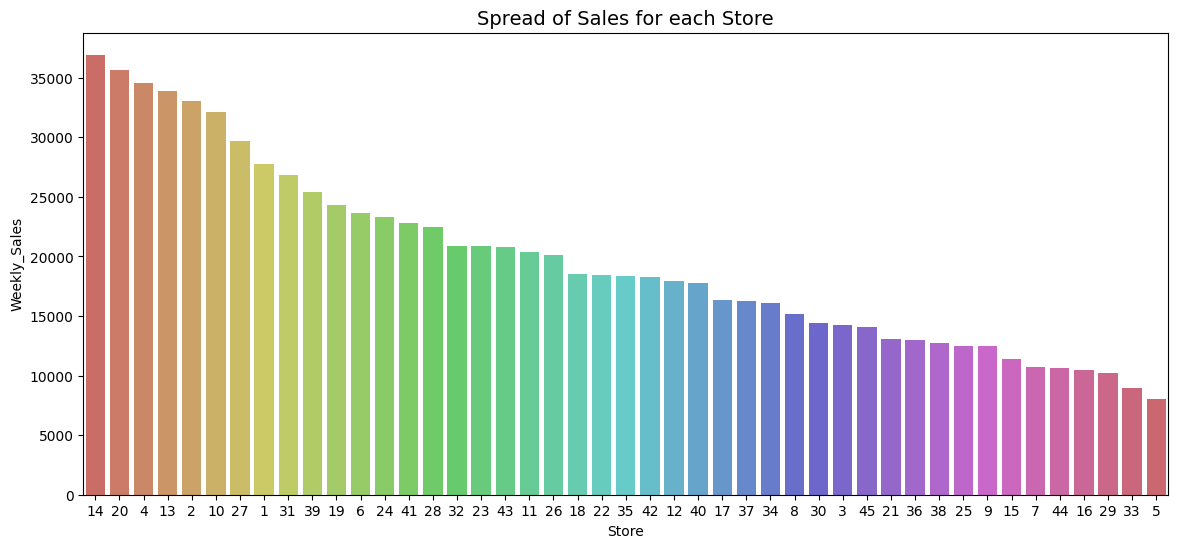

In [ ]:
# Spread of sales for each store
sales_store_std = pd.DataFrame(df.groupby('Store').Weekly_Sales.std()).reset_index()
# display(sales_store_std)

plt.figure(figsize = (14,6))
sns.barplot(x = sales_store_std.Store, y = sales_store_std.Weekly_Sales, data = sales_store_std,
            order = sales_store_std.sort_values('Weekly_Sales', ascending = False).Store, palette = 'hls')
plt.title('Spread of Sales for each Store', fontsize = 14)
plt.show()

- Higher the spread of sales for a store indicate that the store experiences occasional swing in sales by week.


# **EDA Summary**:

1. **Data preparation** -
  - Certain departments have negative sales for few weeks. In the data, 0.3% of records show negative sales. As sales cannot be negative, these rows are dropped.
  - Created a new column ‘Holiday_name’ which takes in string values of the 4 holidays when they occur and accepts ‘Not Holiday’ on non-holiday weeks. Four prominent holidays: Super Bowl, labour day, thanksgiving and Christmas.

2. **Holiday sales analysis** -
  -	Average sales are greater in holidays than non-holiday weeks.
  -	Thanksgiving gets more than USD20000 on average sales in comparison to other holidays.
  - On average 40% more sales are seen in thanksgiving than in non-holiday weeks.
  -	Christmas experiences the lowest average sales which tells that customers spend lesser in retail stores during this time.
  -	Sales during Thanksgiving show variation around USD 40000, close to double the amount seen in non-holiday weeks.

3. **Store types analysis** -
  -	In the proportion of each type across the 45 stores, 49% of stores are type A, with B and C at 38% and 13% respectively.
  -	Type A leads over the other two store types where it gets more than USD 20000 sales on average.
  -	Average weekly sales are the highest on Thanksgiving for types A and B. However, it is not the same for type C. Christmas ranks the lowest in average sales for all types of stores.
  -	Boxplots of the three store types show there is a distinct classification made in terms of sizes.
  -	Hierarchy is observed with type A at the top extreme for the store size, followed by B and C. This trend can be understood by looking at the average weekly sales for A, B and C. Greater the size, higher the sales for that store.

4. **Weekly Sales analysis** -
  - 2011 gets close to USD 2.5 billion, followed by 2010 and 2012 where the latter witnesses USD 500 million less sales.
  -	From the chart of weekly sales for 2010-2012, there is not much difference in sales during super bowl and non-holiday weeks.
  -	The Labour day week witnesses a sharp peak in sales in 2011, in comparison to 2010.
  -	‘Double-peak’ feature is seen from the start of Thanksgiving until Christmas for 2010-2011. Sharp rise in thanksgiving is due to customers hopping to stores to spend. Second peak is bigger than its predecessor which occurs a week before Christmas. This could mean customers spending heavily a week prior Christmas.
  -	On Christmas, the sales drop sharply which could be due to lesser footfall at retail stores.

5. **Monthly sales analysis** -
  -	From monthly analysis of sales, January experiences the lowest sales, with November and December in the top two which could be due to Thanksgiving and Christmas falling in that period.
  -	A heatmap of monthly average sales for each store shows majority of the stores lie below the USD 20000 mark.
  -	There are 6 stores who significantly receive higher sales in comparison to others. In November and December, the sales get over USD 30000.

6. **Markdown analysis** -
  -	In the first markdown, sales peak when markdown is done on super bowl and labour day in 2011. Superbowl experiences majority of markdown events.
  -	For 45 stores, there is a vague trend where average sales increase with rise in markdown value.
  -	Average value of markdowns is the lowest in Labour day. Thanksgiving and Christmas witness markdown with an average value 6 times more than that on non-holiday weeks.
  -	Period of Christmas and Thanksgiving witnesses higher sales and customer footfall. Hence, we can expect retailers to focus on having markdown events in this period to take advantage of the greater customer inflow at the retail stores.

7. **Total sales and spread of sales for each store** -
  -	Top 4 stores 14, 20, 4 and 13 have a variation around USD 35000 in sales.
  -	Higher the standard deviation, the store experiences a occasional swing in sales by week.


# **Preparing the data for forecasting**

## **Compressing the data by averaging for all stores**

The data is for 1-99 departments for each of the 45 stores. So for my time series forecasting, I am compressing the data down by taking average of all stores grouping by date. Forecasting will be done a sales data which will approximately represent an average store. This will require less computational time for decomposing and forecasting the time series.

<Axes: xlabel='Date'>

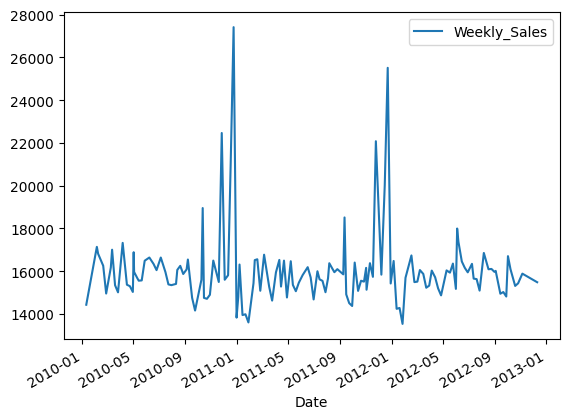

In [ ]:
df_new = pd.DataFrame(df.groupby('Date').Weekly_Sales.mean())
df_new.plot()

## **Decomposing the Time Series**

Period of the seasonality = 12 weeks (by referring from the chart)

[Period of time series in decompose](https://stats.stackexchange.com/questions/482089/statsmodels-seasonal-decompose-what-is-the-right-period-of-the-series-in-th)

<Figure size 1400x800 with 0 Axes>

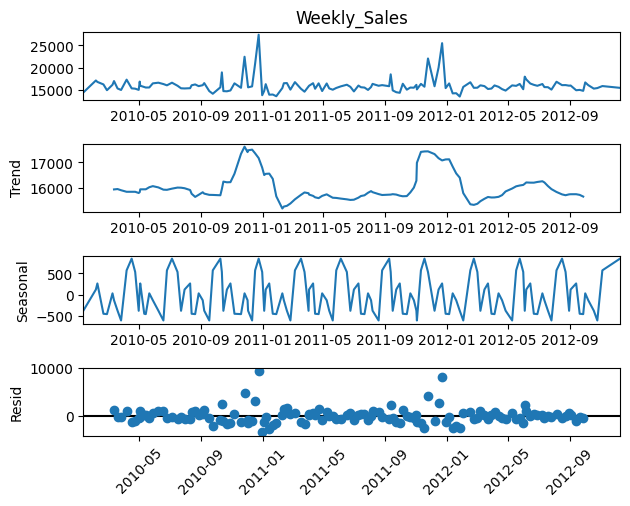

In [ ]:
import statsmodels.api as sm

df_decompose = sm.tsa.seasonal_decompose(df_new['Weekly_Sales'], period = 12) # TS is additive or multiplicative
# multiplicative - works in longer interval (interval more than 5 years)
# additive - works in shorter interval
plt.figure(figsize = (14,8))
df_decompose.plot()
plt.xticks(rotation = 45)
plt.show()

## **Testing the Stationarity of the Time Series**

For a time series to be stationary, the mean and variance/standard deviation should be constant over time so predictions on the time series can be done. For this analysis, we will be using Augmented Dickey Fuller test to check if the time series is stationary or not.

The AD Fuller test is a statistical hypothesis test. The Ho is the data is not stationary and H1 is the data is stationary.
- If the p-value is less than 0.05, there is strong evidence to reject the Ho. We accept the alternate hypothesis, H1.
- If the p-value is greater than 0.05, there is not enough evidence against the null hypothesis. Hence we accept the Ho.


In [ ]:
# AD Fuller test
from statsmodels.tsa.stattools import adfuller

In [ ]:
# testing stationarity
def test_stationarity_new(timeseries):
  # Determining rolling statistic
  rolmean = timeseries.rolling(window = 12).mean() # rolling method - assess the stability of the model over time (here, time = 12 weeks)
  rolstd = timeseries.rolling(window = 12).std()

  # Plot rolling statistics
  orig = plt.plot(timeseries, color = 'blue', label = 'Original')
  mean = plt.plot(rolmean, color = 'red', label = 'Rolling Mean')
  std = plt.plot(rolstd, color = 'black', label = 'Rolling Std')
  plt.legend(loc = 'best')
  plt.title('Rolling Mean and Standard Deviation')
  plt.xticks(rotation = 45)
  plt.show(block = False) # block = False, creates an anti-frozen window. Output generated by matplot can be freezed.

  # Perform Dickey-Fuller Test
  print('Results of Dickey-Fuller Test:')
  dftest = adfuller(timeseries['Weekly_Sales'], autolag = 'AIC') # 'AIC' - Akaike Information Criterion - measure the model performance.
  dfoutput = pd.Series(dftest[0:4], index = ['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
  for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
  print(dfoutput)

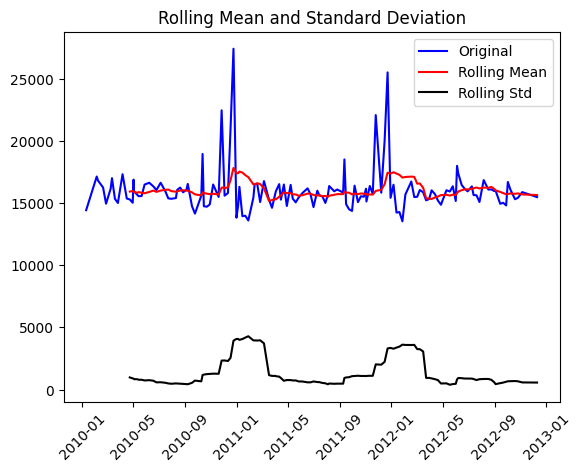

Results of Dickey-Fuller Test:
Test Statistic                -9.921557e+00
p-value                        2.981601e-17
#Lags Used                     0.000000e+00
Number of Observations Used    1.420000e+02
Critical Value (1%)           -3.477262e+00
Critical Value (5%)           -2.882118e+00
Critical Value (10%)          -2.577743e+00
dtype: float64


In [ ]:
test_stationarity_new(df_new)

p-value is less than 0.05, which implies there is strong evidence against the null hypothesis. Hence, we go with the alternate hypothesis and so the **time series is stationary**. In addition to the p-value, the critical values for 1%, 5% and 10% significance level are very close which also indicate the Time series is stationary.

Below differencing is also done just to confirm our results.

### **Differencing of the time series**

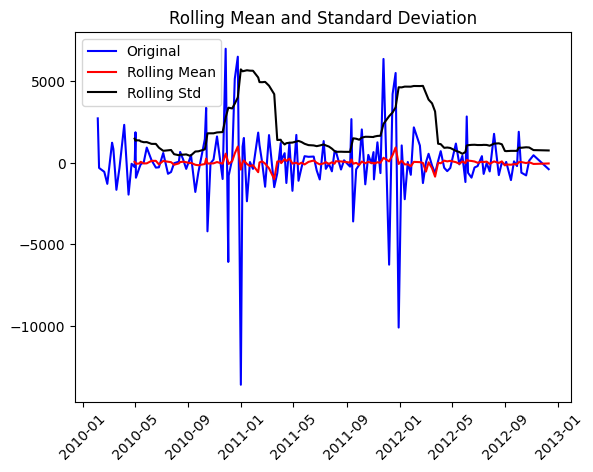

Results of Dickey-Fuller Test:
Test Statistic                -6.402070e+00
p-value                        1.984213e-08
#Lags Used                     9.000000e+00
Number of Observations Used    1.320000e+02
Critical Value (1%)           -3.480888e+00
Critical Value (5%)           -2.883697e+00
Critical Value (10%)          -2.578586e+00
dtype: float64


In [ ]:
df_new_diff = df_new.diff(periods = 1)
df_new_diff.dropna(inplace = True)
test_stationarity_new(df_new_diff)

The result has not changed after performing differencing. The time series is stationary. Now we move onto forecasting where we will be using ARIMA forecasting model.

## **ARIMA (Auto-Regressive Integrated Moving Average)**

It is a stocastic time series model used to predict/forecast future points. Advantage of ARIMA is that it considers the error terms and the observations of lagged terms. ARIMA has three properties each defined by a parameter.

- **AR** stands for Auto-Regression and the '**p**' parameter is an integer value which gives how many lags is needed for predicting the future series.
- **I** stands for Integrated or Differencing and the '**d**' parameter tells how many orders of differencing is done to the time series.
- **MA** stands for Moving Average and the '**q**' parameter is the number of lagged forecast error terms in the prediction equation. It is the error terms of previous time points used to predict current and future value.

To select between the AR and MA model, we take the help of ACF (Auto-Correlation Function) and PACF (Partial Auto-Correlation Function) plots.

### **Auto-Regressive model**
The AR model uses the relationship between the time series and its past time points to predict the future.

Below we have the equation for the AR model.

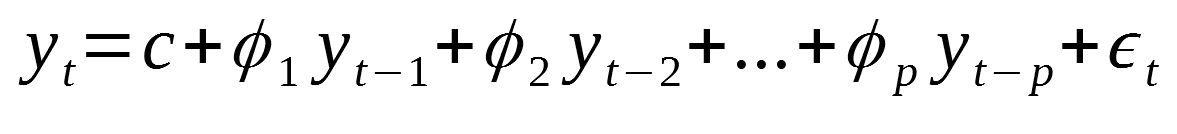

This equation shows the lags $y_{t-1}$ and $y_{t-2}$ etc. $c$ is the intercept and $ϕ_1$, $ϕ_2$, etc are the coefficients of the previous timesteps. The term $∈_t$ is the white noise or the error involved in the prediction.

### **Moving Average (MA)**

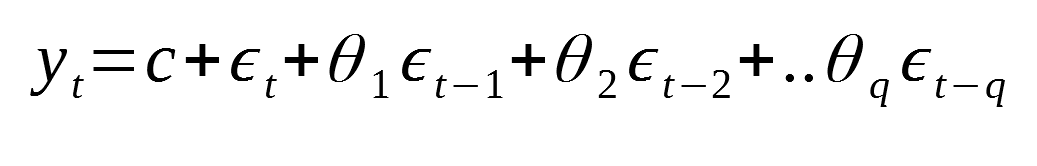

We can see the lagged error terms for the previous time steps. MA models the forecast value as a linear combination of the past error terms. In the equation, $∈_t$, $∈_{t-1}$, and so on, are the error terms and $θ_1$, $θ_2$, etc are their respective coefficients.

## **Finding the Model Parameters using ACF and PACF plots**

**AR(p)**:
- Identification of an AR model is often best done with the PACF. For
finding the 'p' value, we need to look for a sharp initial drop-off in the partial autocorrelation plot.
- For example, PACF drops-off sharply at lag 1 and it is close to zero at the next lag. So 'p' can take 1 or 2.
- Put another way, the number of non-zero partial autocorrelations gives the order of the AR model. By the “order of the model” we mean the most extreme lag of x that is used as a predictor.

**I(d)**:
- The optimal value of 'd' can be found the autocorrelation plot. For example, we perform first order and second order differencing.
- If after second order differencing, the immediate lag goes negative, this means the time series has become over the difference. Therefore we select the first order differencing, i.e., d=1

**MA(q)**:
- Identification of an MA model is often best done with the ACF rather than the PACF.
- For an MA model, we look for an exponential decline in the autocorrelation plot. Instead of identifying a sharp drop-off, the curve should exponential decline towards zero at future lags.

[Reference for ACF, PACF and ARIMA forecasting](https://www.enjoyalgorithms.com/blog/time-series-forecasting-using-machine-learning)


In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

/usr/local/lib/python3.10/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


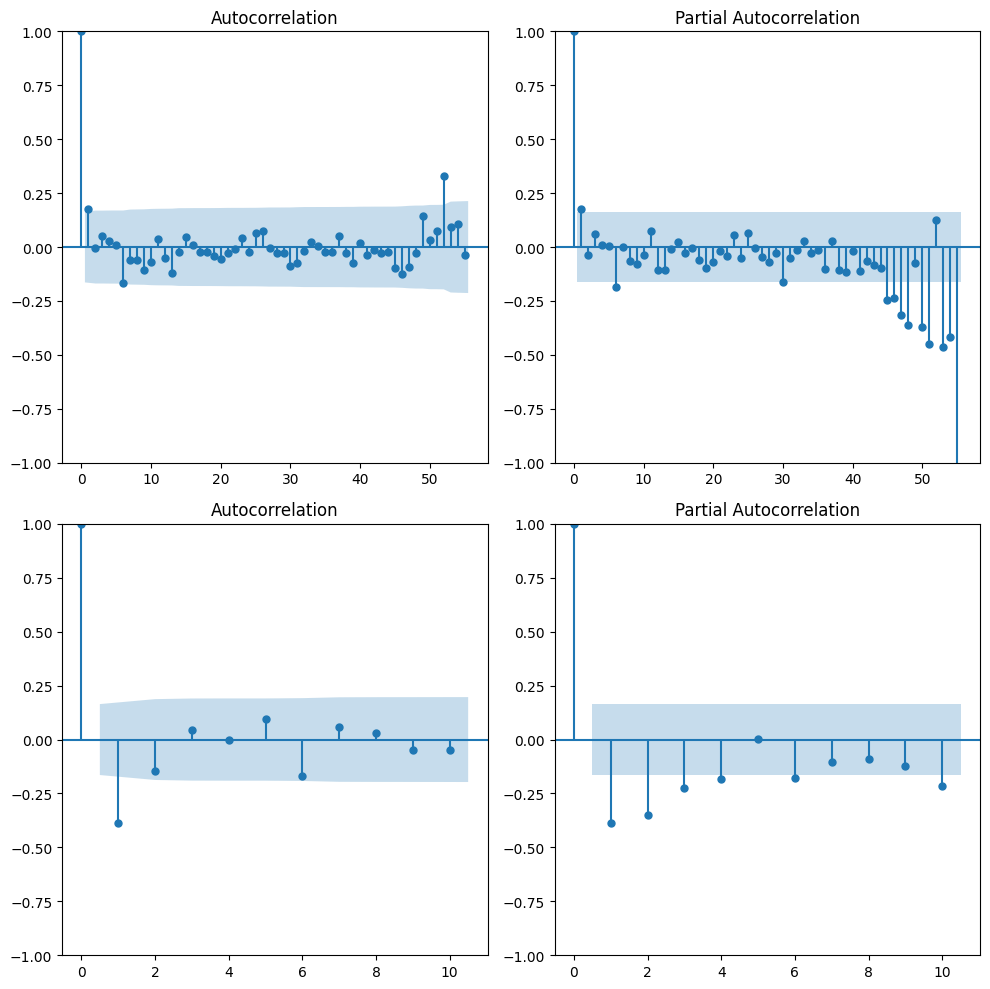

In [ ]:
fig,ax = plt.subplots(2,2,figsize = (10,10))
# original time series
plot_acf(df_new, lags = 55, ax = ax[0,0]) # at seasonal frequency = 52 weeks, autocorrelation is larger at seasonal lag than other lags
plot_pacf(df_new, lags = 55, ax = ax[0,1])
# differencing plots
plot_acf(df_new_diff, lags = 10, ax = ax[1,0])
plot_pacf(df_new_diff, lags = 10, ax = ax[1,1])
plt.tight_layout()
plt.show()

First row of ACF and PACF plots are on original time series. Second row represents the time series with first order differencing applied.

- For AR(p), the PACF plot is recommended. From lag 0 the PACF shuts off at lag 1 beyond which it is negative for the next lag. So value of p is taken as 1. **p=1**

- For I(d), since we have performed first order differencing, **d=1**.

- For MA(q), the ACF declines exponentially to lag 1 and tapers down towards zero. **q=1 or 2**

With the p,d,q values in hand we go onto apply ARIMA model.

### ARIMA (2,1,1)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:           Weekly_Sales   No. Observations:                  143
Model:                 ARIMA(2, 1, 1)   Log Likelihood               -1276.252
Date:                Tue, 13 Jun 2023   AIC                           2560.503
Time:                        13:19:47   BIC                           2572.327
Sample:                             0   HQIC                          2565.308
                                - 143                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3130      0.040      7.828      0.000       0.235       0.391
ar.L2         -0.0470      0.062     -0.752      0.452      -0.169       0.076
ma.L1         -0.9997      0.057    -17.437      0.0

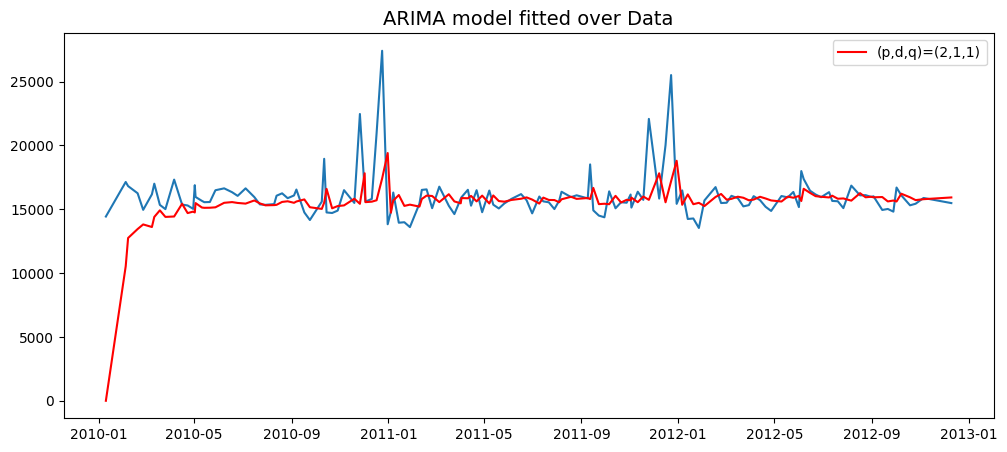

In [ ]:
# p = 2, d = 1, q = 1 or 2
# (2,1,1)
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(df_new, order = (2,1,1))
model_fit = model.fit()
print(model_fit.summary())

plt.figure(figsize = (12,5))
plt.plot(df_new)
plt.plot(model_fit.fittedvalues, color = 'red', label = '(p,d,q)=(2,1,1)')
plt.title('ARIMA model fitted over Data', fontsize = 14)
plt.legend()
plt.show()

### ARIMA (1,1,2)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:           Weekly_Sales   No. Observations:                  143
Model:                 ARIMA(1, 1, 2)   Log Likelihood               -1276.185
Date:                Tue, 13 Jun 2023   AIC                           2560.370
Time:                        13:21:38   BIC                           2572.194
Sample:                             0   HQIC                          2565.175
                                - 143                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1046      0.177      0.592      0.554      -0.242       0.451
ma.L1         -0.7906      0.201     -3.940      0.000      -1.184      -0.397
ma.L2         -0.2090      0.174     -1.198      0.2

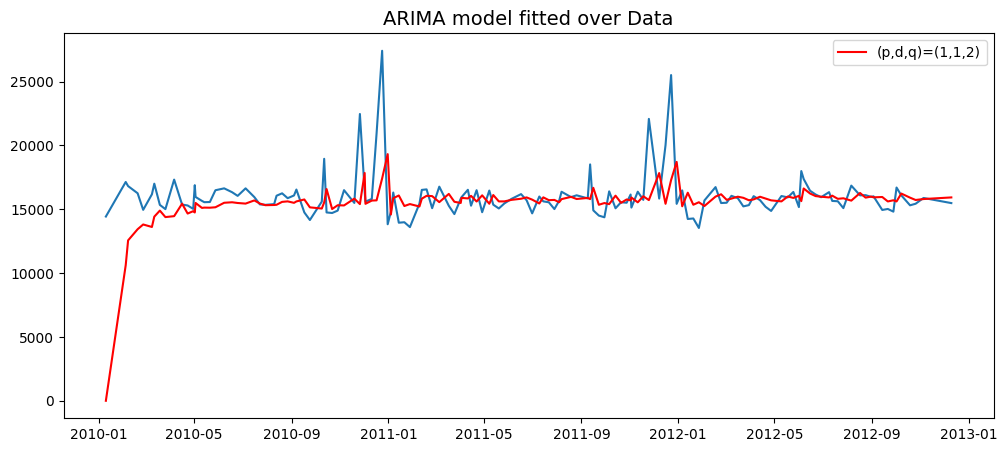

In [ ]:
# Second configuration of values - (1,1,2)
model = ARIMA(df_new, order = (1,1,2))
model_fit_updated = model.fit()
print(model_fit_updated.summary())

plt.figure(figsize = (12,5))
plt.plot(df_new)
plt.plot(model_fit_updated.fittedvalues, color = 'red', label = '(p,d,q)=(1,1,2)')
plt.title('ARIMA model fitted over Data', fontsize = 14)
plt.legend()
plt.show()

As the data has seasonality, ARIMA will not work. We can also use SARIMAX.

## **SARIMAX - Seasonal Auto-Regressive Moving Average Exogenous Factor**

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                     SARIMAX Results                                      
Dep. Variable:                       Weekly_Sales   No. Observations:                  143
Model:             SARIMAX(1, 1, 2)x(1, 1, 2, 12)   Log Likelihood               -1198.487
Date:                            Tue, 13 Jun 2023   AIC                           2410.974
Time:                                    13:21:44   BIC                           2431.047
Sample:                                         0   HQIC                          2419.131
                                            - 143                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8205      0.191     -4.297      0.000      -1.195      -0.446
ma.L1          0.3538      0.203   

Text(0.5, 1.0, 'Forecast using SARIMAX (1,1,2,12)')

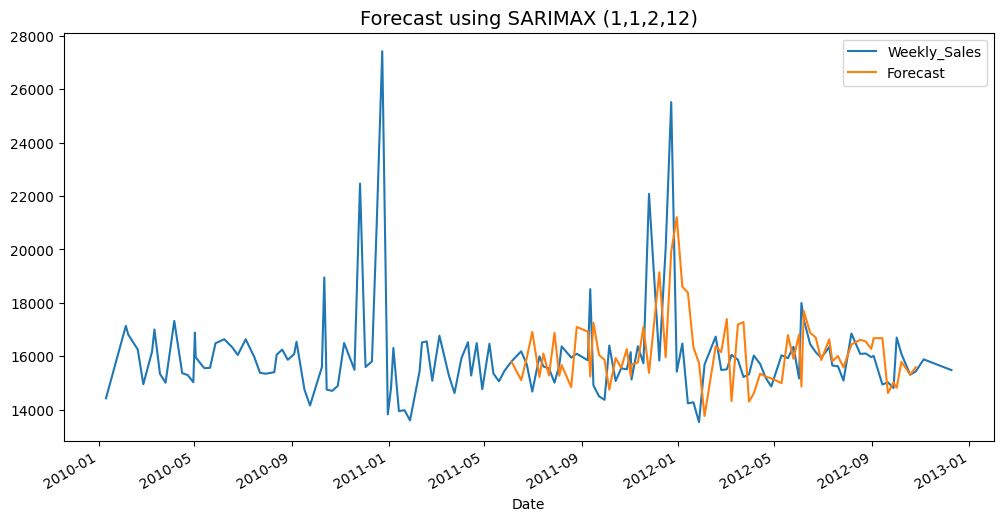

In [ ]:
# SARIMAX - Seasonal Auto-Regressive Moving Average Exogenous Factor
mod = sm.tsa.statespace.SARIMAX(df_new['Weekly_Sales'],
                                order = (1,1,2),
                                seasonal_order = (1,1,2,12))
best_results = mod.fit()
print(best_results.summary())

df_new['Forecast'] = best_results.predict(start=70, end=140)
df_new[['Weekly_Sales','Forecast']].plot(figsize = (12,6))
plt.title('Forecast using SARIMAX (1,1,2,12)', fontsize = 14)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate st

                                     SARIMAX Results                                      
Dep. Variable:                       Weekly_Sales   No. Observations:                  143
Model:             SARIMAX(1, 1, 2)x(1, 1, 2, 52)   Log Likelihood                -776.577
Date:                            Tue, 13 Jun 2023   AIC                           1567.153
Time:                                    13:23:07   BIC                           1584.652
Sample:                                         0   HQIC                          1574.210
                                            - 143                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8571      0.127     -6.762      0.000      -1.106      -0.609
ma.L1          0.2054      0.456   

Text(0.5, 1.0, 'Forecast using SARIMAX (1,1,2,52)')

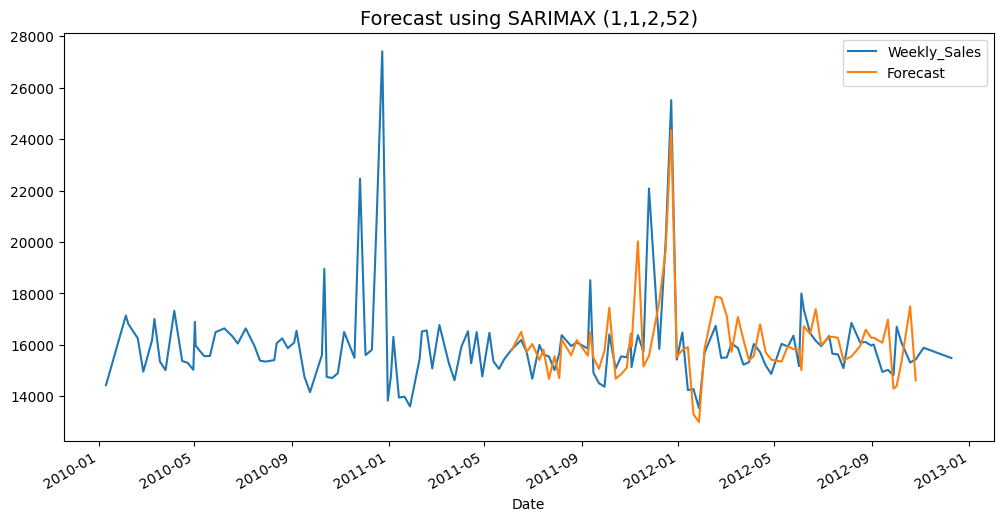

In [ ]:
# SARIMAX - Seasonal Auto-Regressive Moving Average Exogenous Factor
mod = sm.tsa.statespace.SARIMAX(df_new['Weekly_Sales'],
                                order = (1,1,2),
                                seasonal_order = (1,1,2,52))
best_results = mod.fit()
print(best_results.summary())

df_new['Forecast'] = best_results.predict(start=70, end=140)
df_new[['Weekly_Sales','Forecast']].plot(figsize = (12,6))
plt.title('Forecast using SARIMAX (1,1,2,52)', fontsize = 14)

From the SARIMAX model, the prediction is not completely accurate. The model results show some interesting points.
- The log likelihood value is better than previous iteration of SARIMAX for period = 12 (weeks)
- Akaike Information Criteria (AIC) is also lower than for the previous model. AIC is a statistical measure which quantifies the goodness of fit of the model. The lower AIC, the better
- Jarque-Bera value is positive and far from zero meaning the data does not have a normal distribution.

Below is the residuals distribution for this model.

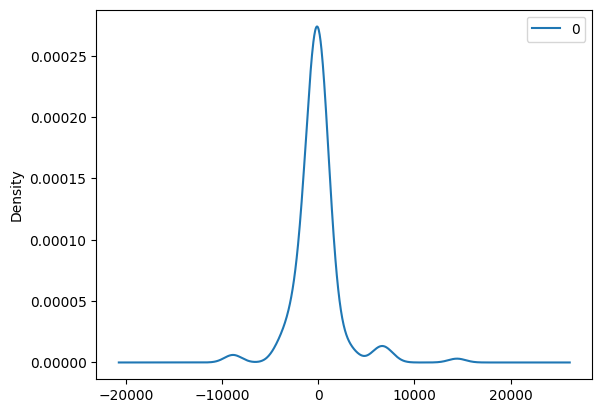

In [ ]:
residuals_updated_new = pd.DataFrame(best_results.resid)

residuals_updated_new.plot(kind = 'kde')
plt.show()

## **Forecasting for the year 2013**

As per the problem statement, we have to predict sales for the following year, 2013. The SARIMAX model will be used to forecast the weekly sales.

In [ ]:
# Copy of dataframe which stores indexes of the dates
df_new_copy = df_new.copy()

df_new_copy.reset_index(inplace = True)
df_new_copy.index +=1
df_new_copy.drop(columns = ['Date','Forecast'], inplace = True)
df_new_copy

,Weekly_Sales
1,14431.171032
2,17139.439912
3,16816.072008
4,16255.185970
5,14955.932194
...,...
139,16090.911806
140,15311.314544
141,15433.541013
142,15885.859584


Using the DateOffset function, we create future dates for the year 2013 by using the weekly frequency.

In [ ]:
from pandas.tseries.offsets import DateOffset
future_dates = [df_new.index[-1] + DateOffset(weeks=x) for x in range(52)]
future_dates = pd.to_datetime(future_dates)

future_dates_df = pd.DataFrame(index = future_dates[1:], columns = df_new.columns)
future_dates_df.head()

future_dates_df.reset_index(inplace = True)
future_dates_df.index += 144
future_dates_df.drop(columns='index', inplace = True)
future_dates_df.head()

# Dataframe stores indexes (start=1, end=194) of current and future dates
future_df = pd.concat([df_new_copy,future_dates_df])
future_df

,Weekly_Sales,Forecast
1,14431.171032,NaN
2,17139.439912,NaN
3,16816.072008,NaN
4,16255.185970,NaN
5,14955.932194,NaN
...,...,...
190,NaN,NaN
191,NaN,NaN
192,NaN,NaN
193,NaN,NaN


In [ ]:
future_dates

DatetimeIndex(['2012-12-10', '2012-12-17', '2012-12-24', '2012-12-31',
               '2013-01-07', '2013-01-14', '2013-01-21', '2013-01-28',
               '2013-02-04', '2013-02-11', '2013-02-18', '2013-02-25',
               '2013-03-04', '2013-03-11', '2013-03-18', '2013-03-25',
               '2013-04-01', '2013-04-08', '2013-04-15', '2013-04-22',
               '2013-04-29', '2013-05-06', '2013-05-13', '2013-05-20',
               '2013-05-27', '2013-06-03', '2013-06-10', '2013-06-17',
               '2013-06-24', '2013-07-01', '2013-07-08', '2013-07-15',
               '2013-07-22', '2013-07-29', '2013-08-05', '2013-08-12',
               '2013-08-19', '2013-08-26', '2013-09-02', '2013-09-09',
               '2013-09-16', '2013-09-23', '2013-09-30', '2013-10-07',
               '2013-10-14', '2013-10-21', '2013-10-28', '2013-11-04',
               '2013-11-11', '2013-11-18', '2013-11-25', '2013-12-02'],
              dtype='datetime64[ns]', freq=None)

In [ ]:
# Creating dataframe which stores the historic and future dates
fut_dates_df = pd.DataFrame(index = future_dates[1:], columns = df_new.columns)
final_dts = pd.concat([df_new,fut_dates_df])

final_dts

,Weekly_Sales,Forecast
2010-01-10,14431.171032,NaN
2010-02-04,17139.439912,NaN
2010-02-07,16816.072008,NaN
2010-02-19,16255.185970,NaN
2010-02-26,14955.932194,NaN
...,...,...
2013-11-04,NaN,NaN
2013-11-11,NaN,NaN
2013-11-18,NaN,NaN
2013-11-25,NaN,NaN


SARIMAX is forecasted on the dataframe containing indexes and sales.

In [ ]:
# SARIMAX - Seasonal Auto-Regressive Moving Average Exogenous Factor
mod = sm.tsa.statespace.SARIMAX(future_df['Weekly_Sales'],
                                order = (1,1,2),
                                seasonal_order = (1,1,2,52))
best_results = mod.fit()
print(best_results.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                     SARIMAX Results                                      
Dep. Variable:                       Weekly_Sales   No. Observations:                  194
Model:             SARIMAX(1, 1, 2)x(1, 1, 2, 52)   Log Likelihood                -776.578
Date:                            Tue, 13 Jun 2023   AIC                           1567.157
Time:                                    13:24:57   BIC                           1587.798
Sample:                                         0   HQIC                          1575.545
                                            - 194                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8569      0.092     -9.337      0.000      -1.037      -0.677
ma.L1          0.2081      0.417   

- Jarque-Bera value is significantly higher, than previous iteration.
- Log likelihood value is better also.

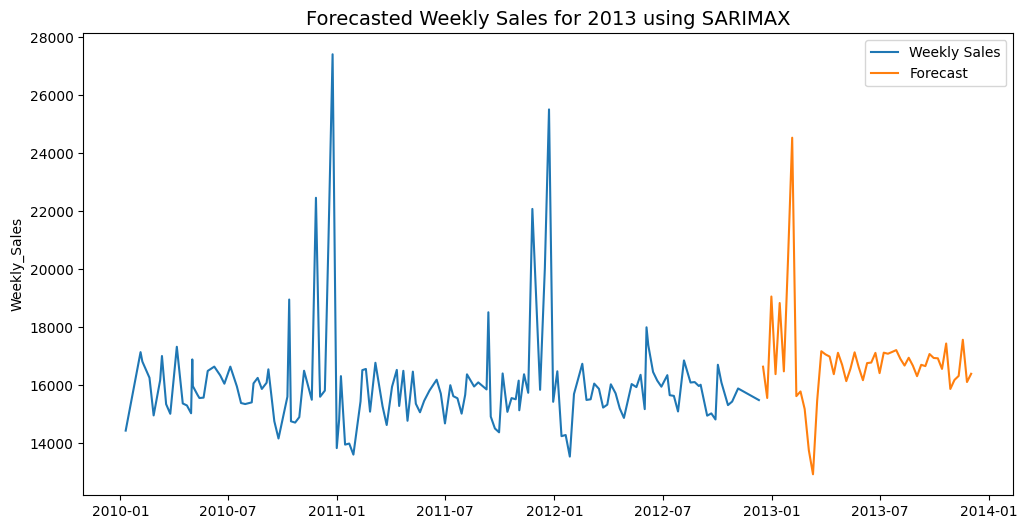

In [ ]:
# Forecasting over offset date indexes created
future_df['Forecast'] = best_results.predict(start=143, end=194)
plt.figure(figsize = (12,6))
sns.lineplot(x = final_dts.index, y = future_df['Weekly_Sales'], label = 'Weekly Sales')
sns.lineplot(x = final_dts.index, y = future_df['Forecast'], label = 'Forecast')
plt.title('Forecasted Weekly Sales for 2013 using SARIMAX', fontsize = 14)
plt.show()

- The model does not correctly predict the 'double hump' feature in the forecast which is observed in the original data around the months of November and December.
- There are some discrepancies in the prediction as the normal trend of the series is not totally captured by the model.

# **Conclusion**

- This capstone project is part of the Careerera Post Graduate Programme Data Science Course. The project focusses on understanding the sales of Walmart stores, looking at the effect of markdowns and predicting for the year 2013.
- Three datasets, Stores, Sales and Features, are merged and data cleaning tasks like dropping duplicates and impute the missing values.
- Exploratory Data Analysis on the time series data shows sales greater in holidays with Thanksgiving seeing 40% more sales than others. Markdown value is 6 times more on Thanksgiving than non-holidays.
- 49% of type A stores get USD20000 more in sales than B and C. A 'double-peak' feature in sales appears during Thanksgiving and Christmas, indicating rise in footfall at stores in Thanksgiving and high sales. But, feature sharply declines in Christmas meaning customers do not look to spend in this time.
- Data is prepared by converting the time series into a univariate series by averaging on each week. This gives a representative time series of a store. Time series is found to be stationary from the Augmented-Dickey Fuller hypothesis test. Prediction on series is done using ARIMA and Seasonal ARIMA models with the parameters p,d,q determined from Auto-correlation Function and Partial Auto-correlation Function plots.
- Future sales forecasting is done on dates produced for 52 weeks using DateOffset function in pandas with seasonal ARIMA model where p,d,q values are 1,1,2.